<a href="https://colab.research.google.com/github/iarbietonilsson/Credit-Card-Market-Segmentation/blob/main/CreditCardMarketSegmentation_Ingrid_Project2_4a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Market Segmentation / Project 2 - Part 4 (Core)**

---

* ### Ingrid Arbieto Nelson

# **Overview : Part 1**<a name='Part 1: Overview'>

---
![image](https://drive.google.com/uc?id=1kRUsWwtU1KS6sgNJyHOgLpmphNLr1JS6)

[**Image credit**](https://www.istockphoto.com/portfolio/alexialex?mediaty)
##**Chosen Dataset : Predicting Credit Card Customer Segmentation** 

###**Part 1**

---



####**1 Source of data**
*  [Credit Card Customer Segmentation](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m)
   * [The Devastator](https://www.kaggle.com/thedevastator)

####**2 Brief description of data**

*This dataset contains a wealth of customer information collected from within a consumer credit card portfolio, with the aim of helping analysts predict customer attrition. It includes comprehensive demographic details such as age, gender, marital status and income category, as well as insight into each customer’s relationship with the credit card provider such as the card type, number of months on book and inactive periods. Additionally it holds key data about customers’ spending behavior drawing closer to their churn decision such as total revolving balance, credit limit, average open to buy rate and analyzable metrics like total amount of change from quarter 4 to quarter 1, average utilization ratio and Naive Bayes classifier attrition flag (Card category is combined with contacts count in 12months period alongside dependent count plus education level & months inactive). Faced with this set of useful predicted data points across multiple variables, capture up-to-date information that can determine long term account stability or an impending departure; therefore, offering us an equipped understanding when seeking to manage a portfolio or serve individual customers.*

#### **3 What is the target?**

*The target is whether the bank customer will churn.*

**Attrition_Flag:** *Flag indicating whether a customer has churned out*

#### **4 What does one row represent? *(A person? A business? An event? A product?)***

*Each row represents a bank customer.*

#### **5 Is this a classification or regression problem?**

*This is a classification problem. The goal is to determine whether the bank customer has churned or not. This is a yes or no question.*

#### **6 How many features does the data have?**

*There are 20 features.*
<br />

#### ***Features:***

---  

![image](https://drive.google.com/uc?id=1BdR6oZbzLq5_G7bSbuDTgzO9MsNfHnWH)
![image](https://drive.google.com/uc?id=1K9EBqKt0tl-nPodKxe822cirt7l7dhW-)
<br />

#### **7 How many rows are in the dataset?**

*There are 10,127 rows.*

#### **8 What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

* *There are numerous numerical & categorical columns to encode, which could be fun!*
* *Attrition class is imbalanced, so this could cause some tuning of hyperparameter challenges in this assignment.*
* *I'm curious about the Native Bayes Classifier Attrition Flag, and looking into what that means.*



#**Data Cleaning & Exploratory Data Analysis (EDA): Part 2**<a name = 'Data Cleaning & Exploratory Data Analysis (EDA): Part 2'>

---


##**Assignment: Project 2 - Part 2**


Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

* *Deleted unnecessary columns.*
* *Deleted duplicate rows.*
* *Identified and addressed missing values.*
* *Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).*
* *Produced univariate visuals for the target and all features.*
* *Identified outliers.*
* *Clearly commented all of your cleaning steps and described any decisions you made.*

##**Data Cleaning**

###**Import Libraries**

---



In [ ]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

# Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

# Unsupervised Learning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import set_config
set_config(display='diagram')

### **Load Data**

---


In [ ]:
file = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTJRlbZpZfRCHuwSt6HBuzDTp5y37PdIVLHRtk4uq4WgpZ1jttdnIlpkTys2LSqXEBELtg04ZZylJBU/pub?gid=468663766&single=true&output=csv'
df = pd.read_csv(file)

# display 1st 5 rows
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

* Data appears to have loaded correctly.
* We are unable to view all the columns.
* Naive Bayes Classifier Attrition Flags have long names. *(for inactive years 1 & 2)*
  *  *Shorten Naive Bayes Classifier Attrition column names for readability.* 

In [ ]:
# make a copy of dataframe
df2 = df.copy()

In [ ]:
## Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f"The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable, 'Attrition Flag'.")

There are 10127 rows, and 23 columns.
The rows represent 10127 observations, and the columns represent 22 features and 1 target variable, 'Attrition Flag'.


### **Set Display Options**

---



In [ ]:
## Display all columns
pd.set_option('display.max_column', None)

### **Shorten Naive Bayes Classifier Attrition Flag Inactive Years 1 & 2 Names**

---



In [ ]:
# show column names
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
## Rename Naive Bayes Classifier Attribution Flag month 1
df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'Naive_Bayes_Class_Inactive_1Year_Flag',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'Naive_Bayes_Class_Inactive_2Year_Flag'},inplace=True)

In [ ]:
# display 1st 5 rows
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  Naive_Bayes_Class_Inactive_1Year_Flag  \
0                  0.061                               0.000093   
1                  0.105                               0.000057   
2                  0.000                               0.000021   
3                  0.760                               0.000134   
4                  0.000                               0.000022   

   Naive_Bayes_Class_Inactive_2Year_Flag  
0                                0.99991  
1                                0.99994  
2                                0.99998  
3                                0.99987  
4                                0.99998

In [ ]:
## display column names, count of non-null values, and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CLIENTNUM                              10127 non-null  int64  
 1   Attrition_Flag                         10127 non-null  object 
 2   Customer_Age                           10127 non-null  int64  
 3   Gender                                 10127 non-null  object 
 4   Dependent_count                        10127 non-null  int64  
 5   Education_Level                        10127 non-null  object 
 6   Marital_Status                         10127 non-null  object 
 7   Income_Category                        10127 non-null  object 
 8   Card_Category                          10127 non-null  object 
 9   Months_on_book                         10127 non-null  int64  
 10  Total_Relationship_Count               10127 non-null  int64  
 11  Mo

In [ ]:
## display descriptive statistics for categorical columns
df.describe(include="object") # or 'number'

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

### **Remove Unnecessary Columns**

---



In [ ]:
# check how man unique client numbers exist
df['CLIENTNUM'].value_counts()

768805383    1
711784908    1
720133908    1
803197833    1
812222208    1
            ..
796903083    1
716014983    1
712521783    1
780045708    1
714337233    1
Name: CLIENTNUM, Length: 10127, dtype: int64

* CLIENTNUM (unique client number) is a unique ID for each bank customer.
   * *It is good to drop this irrevalent column, as it is unique in every row.*

In [ ]:
df.drop(columns='CLIENTNUM', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Attrition_Flag                         10127 non-null  object 
 1   Customer_Age                           10127 non-null  int64  
 2   Gender                                 10127 non-null  object 
 3   Dependent_count                        10127 non-null  int64  
 4   Education_Level                        10127 non-null  object 
 5   Marital_Status                         10127 non-null  object 
 6   Income_Category                        10127 non-null  object 
 7   Card_Category                          10127 non-null  object 
 8   Months_on_book                         10127 non-null  int64  
 9   Total_Relationship_Count               10127 non-null  int64  
 10  Months_Inactive_12_mon                 10127 non-null  int64  
 11  Co

###**Duplicates**

---



In [ ]:
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.



### **Inspect Values for Errors**

---
<br />

#### **Numeric:**
* Check for extreme or impossible values, such as negative numbers.
   * *No unusual numerical values noted.*

 ### **Summary Statistics for Numeric Features**

---

In [ ]:
## display descriptive statistics for numeric columns
df.describe(include="number").round(2) # or 'object'

Customer_Age  Dependent_count  Months_on_book  \
count      10127.00         10127.00        10127.00   
mean          46.33             2.35           35.93   
std            8.02             1.30            7.99   
min           26.00             0.00           13.00   
25%           41.00             1.00           31.00   
50%           46.00             2.00           36.00   
75%           52.00             3.00           40.00   
max           73.00             5.00           56.00   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                  10127.00                10127.00   
mean                       3.81                    2.34   
std                        1.55                    1.01   
min                        1.00                    0.00   
25%                        3.00                    2.00   
50%                        4.00                    2.00   
75%                        5.00                    3.00   
max                        6.00                    6.00   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count               10127.00      10127.00             10127.00   
mean                    2.46       8631.95              1162.81   
std                     1.11       9088.78               814.99   
min                     0.00       1438.30                 0.00   
25%                     2.00       2555.00               359.00   
50%                     2.00       4549.00              1276.00   
75%                     3.00      11067.50              1784.00   
max                     6.00      34516.00              2517.00   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count         10127.00              10127.00         10127.00        10127.00   
mean           7469.14                  0.76          4404.09           64.86   
std            9090.69                  0.22          3397.13           23.47   
min               3.00                  0.00           510.00           10.00   
25%            1324.50                  0.63          2155.50           45.00   
50%            3474.00                  0.74          3899.00           67.00   
75%            9859.00                  0.86          4741.00           81.00   
max           34516.00                  3.40         18484.00          139.00   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count             10127.00               10127.00   
mean                  0.71                   0.27   
std                   0.24                   0.28   
min                   0.00                   0.00   
25%                   0.58                   0.02   
50%                   0.70                   0.18   
75%                   0.82                   0.50   
max                   3.71                   1.00   

       Naive_Bayes_Class_Inactive_1Year_Flag  \
count                               10127.00   
mean                                    0.16   
std                                     0.37   
min                                     0.00   
25%                                     0.00   
50%                                     0.00   
75%                                     0.00   
max                                     1.00   

       Naive_Bayes_Class_Inactive_2Year_Flag  
count                               10127.00  
mean                                    0.84  
std                                     0.37  
min                                     0.00  
25%                                     1.00  
50%                                     1.00  
75%                                     1.00  
max                                     1.00



####**Categorical:**
* Check for inconsistent categories.
   *  *Check categorical columns for inconsistent data.*

 ### **Summary Statistics for Categorical Features**

---

In [ ]:
## display descriptive statistics for categorical columns
df.describe(include="object") # or 'number'

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [ ]:
# find string data 
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [ ]:
# loop through string data to inspect for inconsistent values
for col in str_cols:
   print(f'= {col}:')
   print(df[col].value_counts(dropna=False))
   print("\n\n")

= Attrition_Flag:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64



= Gender:
F    5358
M    4769
Name: Gender, dtype: int64



= Education_Level:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64



= Marital_Status:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64



= Income_Category:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64



= Card_Category:
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64





* **```Education_Level```**, **```Marital_Status```**, and **```Income_Category```** all have a category **'Unknown'**.
   *  *This appears to be a missing or unknown value.*

In [ ]:
# ? category for Education Level, Marital Status, & Income Category have category 'Unknown' => looks like missing or unknown values
# replace as missing value
df = df.replace('Unknown', np.nan)

In [ ]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
df['Income_Category'].replace({'Less than $40K':'0 Less than $40K', '$40K - $60K':'1 $40K - $60K', '$80K - $120K':'3 $80K - $120K',
                               '$60K - $80K':'2 $60K - $80K', '$120K +':'4 $120K +'},inplace=True)

In [ ]:
df['Income_Category'].value_counts()

0 Less than $40K    3561
1 $40K - $60K       1790
3 $80K - $120K      1535
2 $60K - $80K       1402
4 $120K +            727
Name: Income_Category, dtype: int64

In [ ]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
df['Education_Level'].replace({'Uneducated':'0 Uneducated','High School':'1 High School', 'College':'2 College', 'Graduate':'3 Graduate', 'Post-Graduate':'4 Post-Graduate','Doctorate':'5 Doctorate'},inplace=True)

In [ ]:
df['Education_Level'].value_counts()

3 Graduate         3128
1 High School      2013
0 Uneducated       1487
2 College          1013
4 Post-Graduate     516
5 Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [ ]:
df['Card_Category'].replace({'Blue':'0 Blue','Silver':'1 Silver','Gold':'1 Gold','Platinum':'3 Platinum'},inplace=True)

In [ ]:
df['Card_Category'].value_counts()

0 Blue        9436
1 Silver       555
1 Gold         116
3 Platinum      20
Name: Card_Category, dtype: int64

### **Missing Values**

---



In [ ]:
## display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 3380 missing values.


In [ ]:
## If there are missing values we could
## Display the count of missing values by column
print(df.isna().sum())

Attrition_Flag                              0
Customer_Age                                0
Gender                                      0
Dependent_count                             0
Education_Level                          1519
Marital_Status                            749
Income_Category                          1112
Card_Category                               0
Months_on_book                              0
Total_Relationship_Count                    0
Months_Inactive_12_mon                      0
Contacts_Count_12_mon                       0
Credit_Limit                                0
Total_Revolving_Bal                         0
Avg_Open_To_Buy                             0
Total_Amt_Chng_Q4_Q1                        0
Total_Trans_Amt                             0
Total_Trans_Ct                              0
Total_Ct_Chng_Q4_Q1                         0
Avg_Utilization_Ratio                       0
Naive_Bayes_Class_Inactive_1Year_Flag       0
Naive_Bayes_Class_Inactive_2Year_F

In [ ]:
## display percentage of missing values by column
print(df.isna().sum()/len(df)*100)

Attrition_Flag                            0.000000
Customer_Age                              0.000000
Gender                                    0.000000
Dependent_count                           0.000000
Education_Level                          14.999506
Marital_Status                            7.396070
Income_Category                          10.980547
Card_Category                             0.000000
Months_on_book                            0.000000
Total_Relationship_Count                  0.000000
Months_Inactive_12_mon                    0.000000
Contacts_Count_12_mon                     0.000000
Credit_Limit                              0.000000
Total_Revolving_Bal                       0.000000
Avg_Open_To_Buy                           0.000000
Total_Amt_Chng_Q4_Q1                      0.000000
Total_Trans_Amt                           0.000000
Total_Trans_Ct                            0.000000
Total_Ct_Chng_Q4_Q1                       0.000000
Avg_Utilization_Ratio          

* For ***Missing categorical values***, we'll need to impute with a Preprocessor for Machine Learning.
   * **Education Level** : Plan to impute with most frequent value.
      * *This will introduce error into model.*
   * **Marital Status** : Plan to impute with most frequent value.
      * *This will introduce error into model.*
   * **Income Category** : Plan to impute with most frequent value.
      * *This will introduce error into model.*


## **EDA : Exploratory Visuals & Analysis**

---

* EDA allows us to explore our data, and get a better understanding of trends, features of the data.
<br />
<br />

###**Numerical**


---


* For each numerical feature, we will plot the distribution, as well as a boxplot.
* Boxplots will tell us if there are any outliers.

In [ ]:
# find numerical column names
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Class_Inactive_1Year_Flag',
       'Naive_Bayes_Class_Inactive_2Year_Flag'],
      dtype='object')

In [ ]:
# set seaborn color style
plt.style.use(['seaborn-pastel'])

C:\Users\sweet\AppData\Local\Temp\ipykernel_18748\930698771.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-pastel'])


In [ ]:
def plot_numeric(df,col):
  """EDA function to plot histogram and boxplot for selected column"""
  # figure and axes share same x-axis
  fig, axes = plt.subplots(nrows=2,figsize=(8,6),sharex=True)

  # seaborn plots with axes[i]
  sns.histplot(data=df,x=col,ax=axes[0])
  # plot shows mean value
  mean_value=df[col].mean()
  axes[0].axvline(mean_value,color='purple',ls='--',
                  label=f"Mean Value = {mean_value:,.2f}",);
  # plot shows median value
  median_value = df[col].median()
  axes[0].axvline(median_value,color='k',ls='-',
                  label=f"Median Value = {median_value:,.2f}");
  axes[0].legend();
  sns.boxplot(data=df, x = col, ax = axes[1])
 

  # title for top graph
  axes[0].set_title(f'EDA for {col}')
  # format to save figure plot to not be cutoff
  plt.tight_layout()
  plt.show()

In [ ]:
str_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [ ]:
def plot_violin(data, x, y, hue,split):
  """EDA function to plot violinplot for selected column"""
  # figure and axes share same x-axis
  fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(8,5))
  
  sns.violinplot(data=data,x=x,y=y, hue=hue,split=split,inner='quartiles');
  #title for graph
  axes.set_title(f'{x} vs {y} by Attrition')

  # format to save figure plot to not be cutoff
  plt.tight_layout()
  plt.show()

####**EDA for Customer Age**

---



In [ ]:
attrition_filter = df['Attrition_Flag'] == 'Attrited Customer'
attrition_df = df.loc[attrition_filter,:]
existing_filter = df['Attrition_Flag'] == 'Existing Customer'
existing_df = df.loc[existing_filter,:]

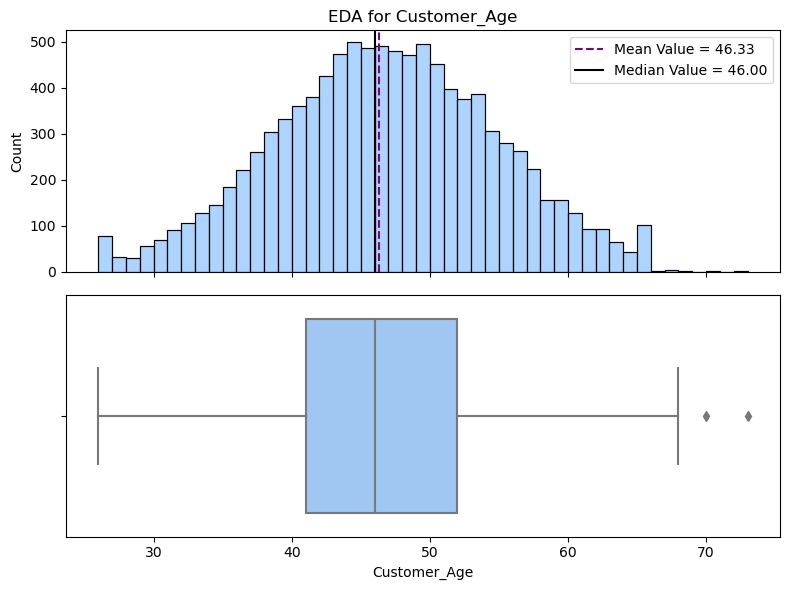

In [ ]:
plot_numeric(df,'Customer_Age')

In [ ]:
age_sorted = df['Customer_Age'].sort_values(ascending=False)
age_sorted.head()

251    73
254    70
198    68
151    68
432    67
Name: Customer_Age, dtype: int64

* Outlier Customer Age values of 73 & 70 are valid ages, not an improbable age in the dataset. 
* No ages will be dropped.

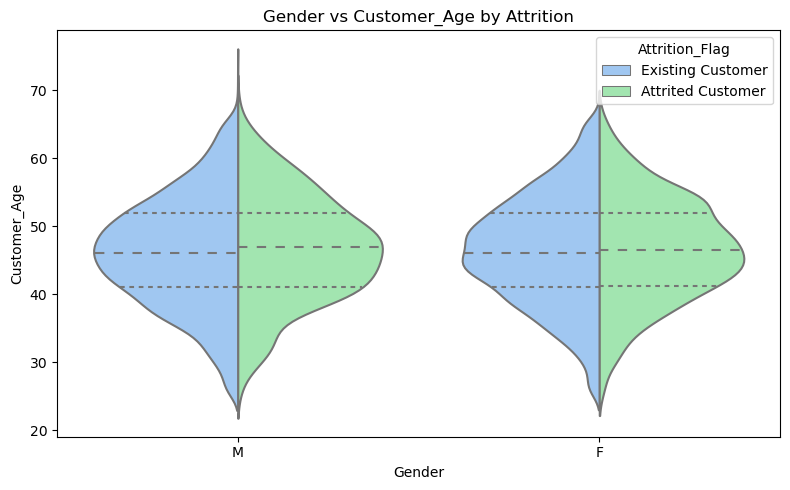

In [ ]:
plot_violin(data=df, x='Gender', y='Customer_Age',hue='Attrition_Flag',split=True)

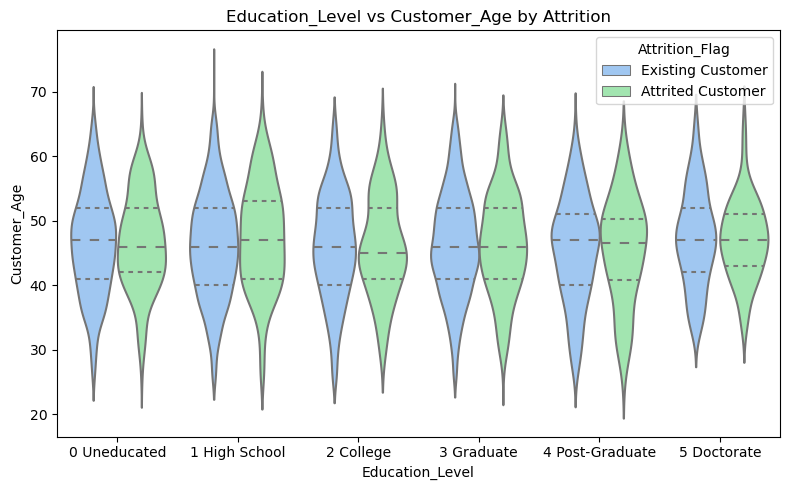

In [ ]:
plot_violin(data=df.sort_values(by='Education_Level'), x='Education_Level', y='Customer_Age',hue='Attrition_Flag',split=False)

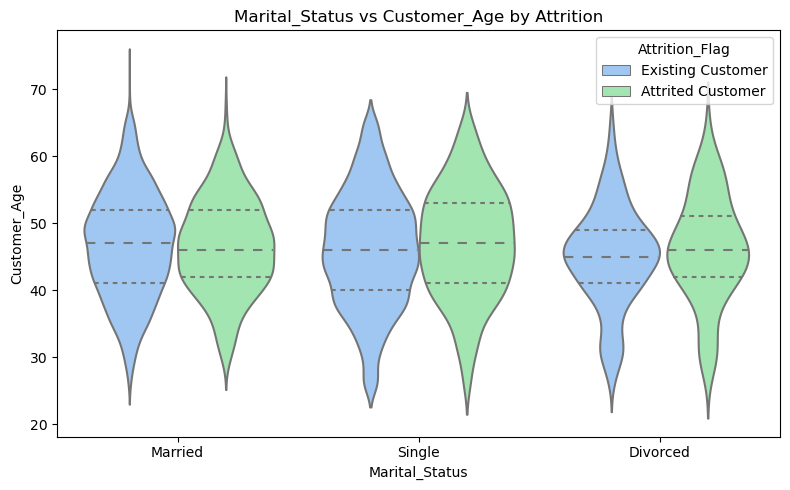

In [ ]:
plot_violin(data=df, x='Marital_Status', y='Customer_Age',hue='Attrition_Flag',split=False)

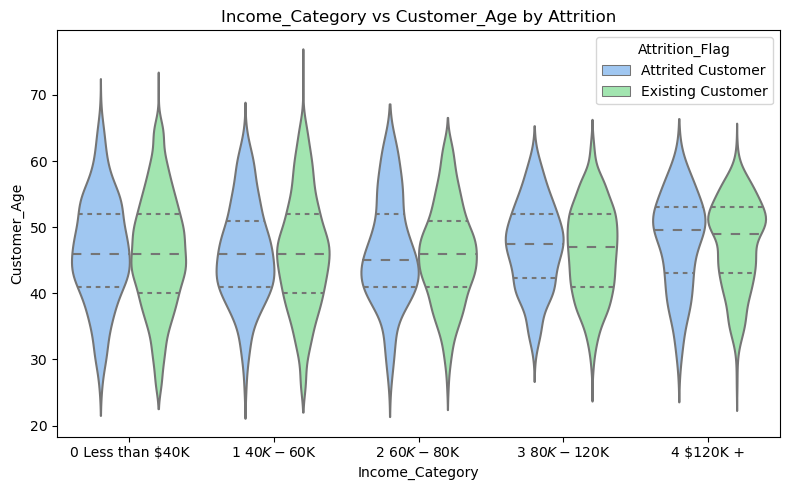

In [ ]:
plot_violin(data=df.sort_values(by='Income_Category'), x='Income_Category', y='Customer_Age',hue='Attrition_Flag',split=False)

* Higher Income customers are older, but the difference between those that exit credit card to existing customers is flat.

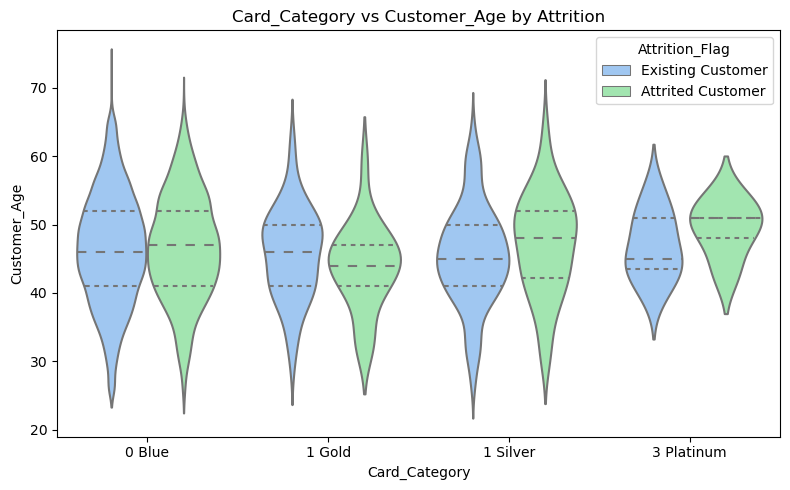

In [ ]:
plot_violin(data=df.sort_values(by='Card_Category'), x='Card_Category', y='Customer_Age',hue='Attrition_Flag',split=False)

* Older Silver and Platinum Card holders tend to exit the credit card company.

####**EDA for Dependent Count**

---

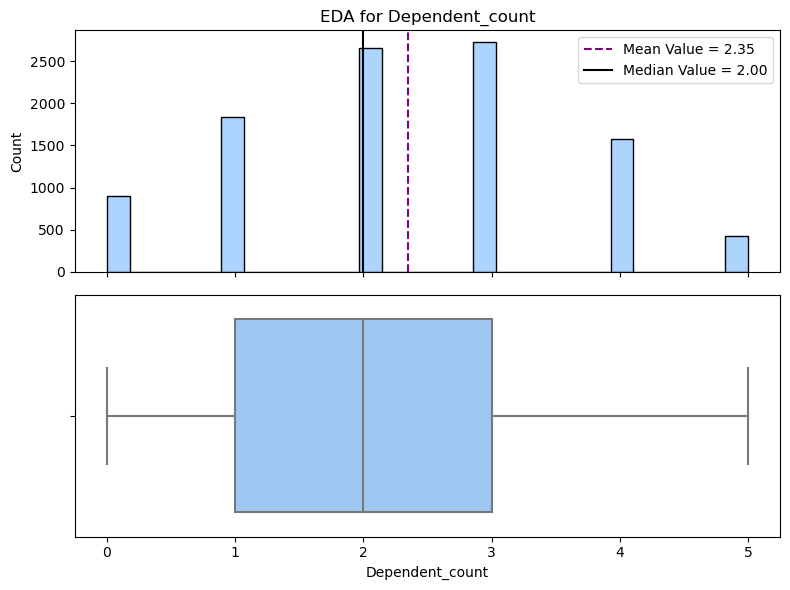

In [ ]:
plot_numeric(df,'Dependent_count')

* Dependent count has a range of values of 0 to 5.
* This is a reasonable dependent range.

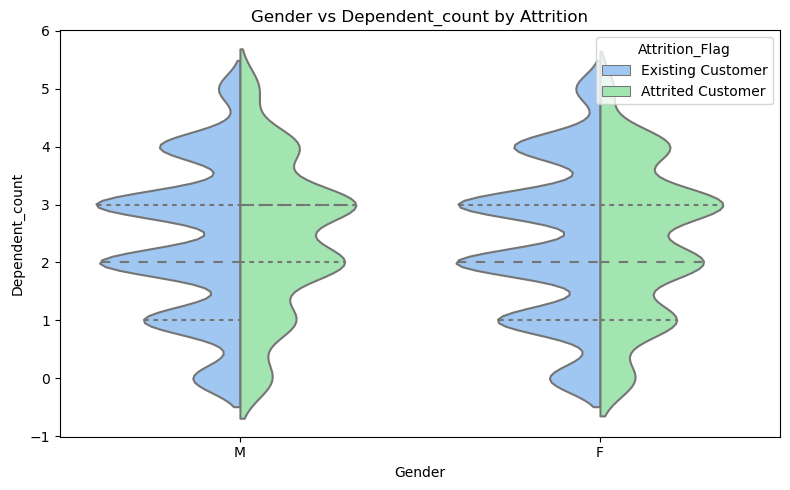

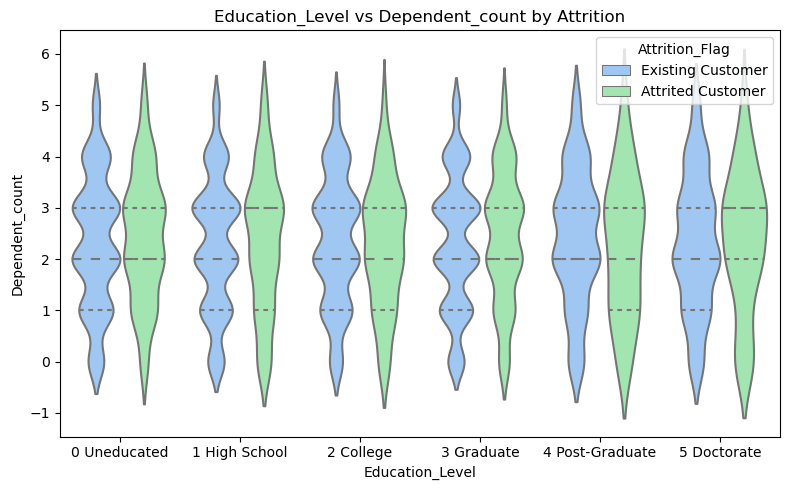

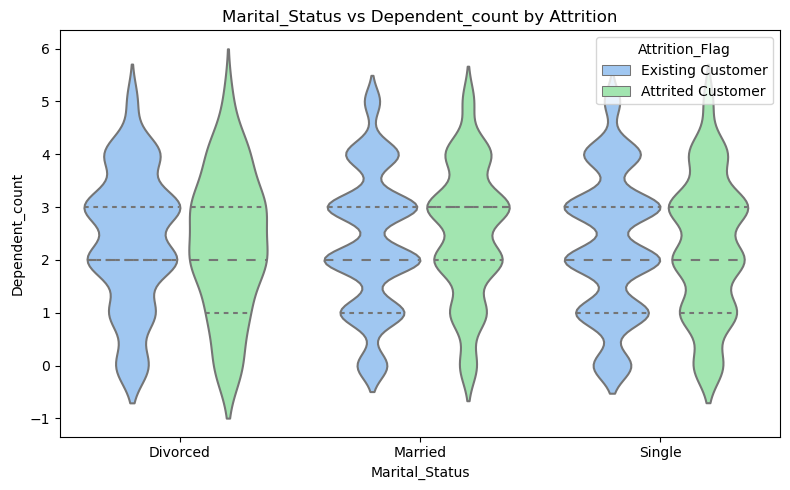

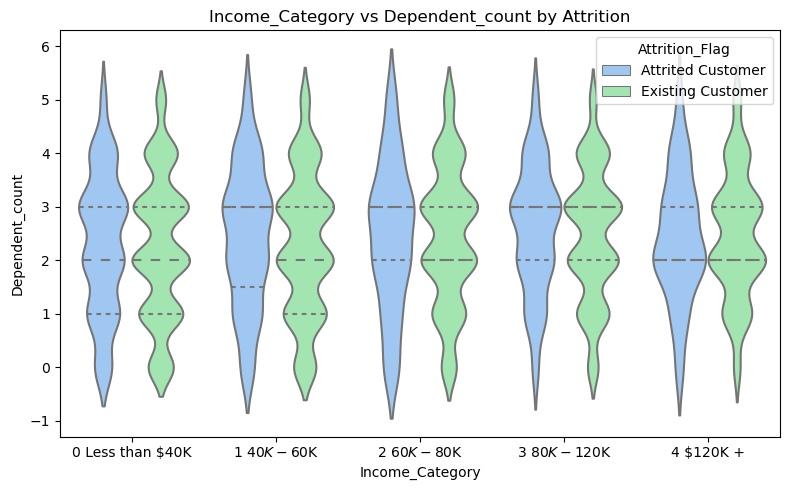

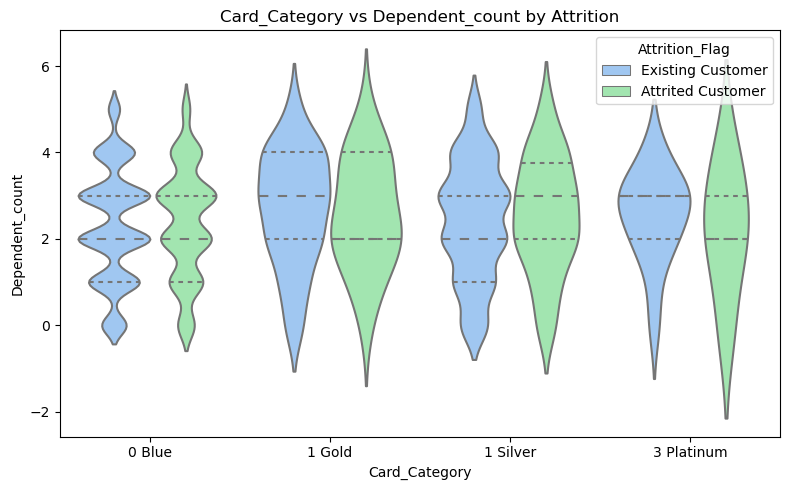

In [ ]:
for col in str_cols[1:] :
  if col != 'Gender' :
    plot_violin(data=df.sort_values(by=col), x=col, y='Dependent_count',hue='Attrition_Flag',split=False)
  else:
    plot_violin(data=df, x=col, y='Dependent_count',hue='Attrition_Flag',split=True)

####**EDA for Months on the Books**

---
* *how long bank customer has been a customer*

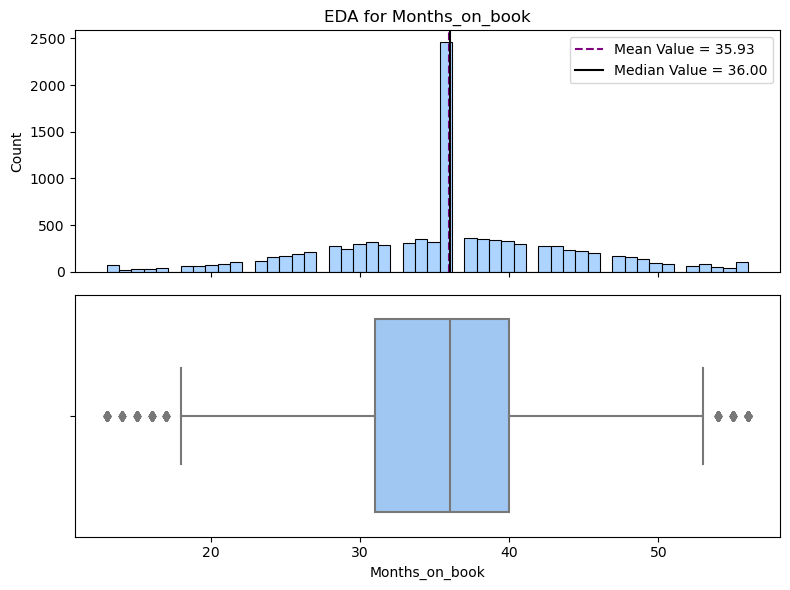

In [ ]:
plot_numeric(df,'Months_on_book')

In [ ]:
mthbooks_sorted = df['Months_on_book'].sort_values(ascending=False)
mthbooks_sorted.head()

1760    56
2406    56
177     56
1330    56
1321    56
Name: Months_on_book, dtype: int64

In [ ]:
mthbooks_sorted.tail()

9625    13
3841    13
1852    13
6925    13
2977    13
Name: Months_on_book, dtype: int64

* Bank customers from 13 months up to 56 months or 4.67 years is a reasonable length of time.

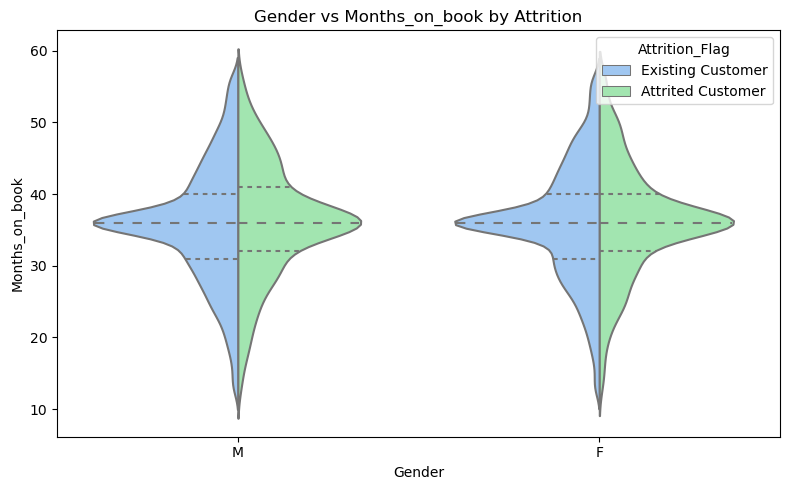

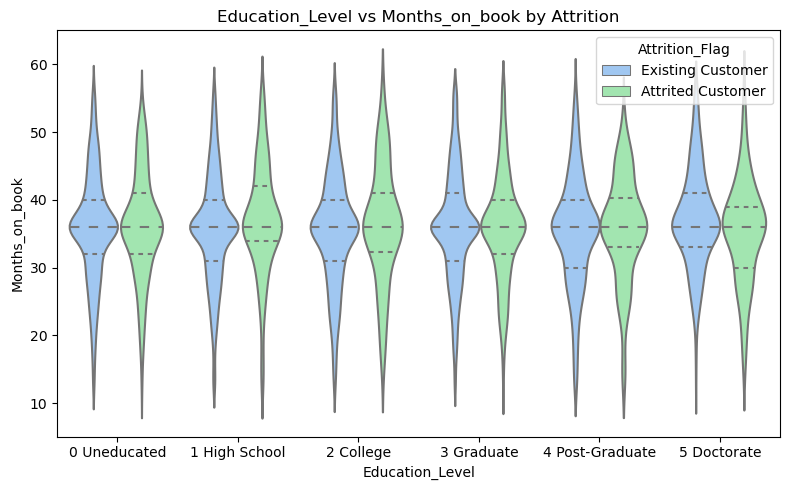

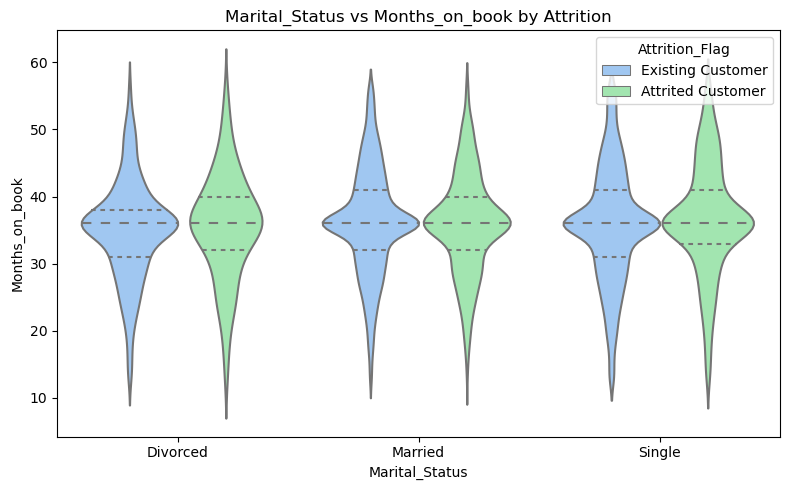

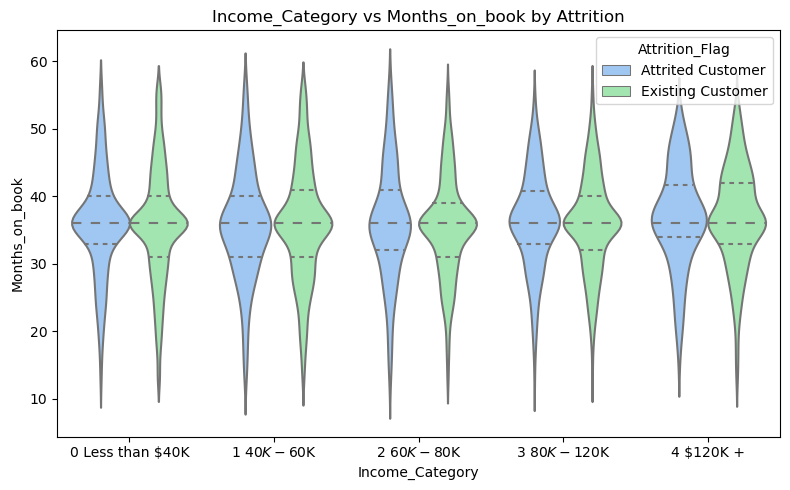

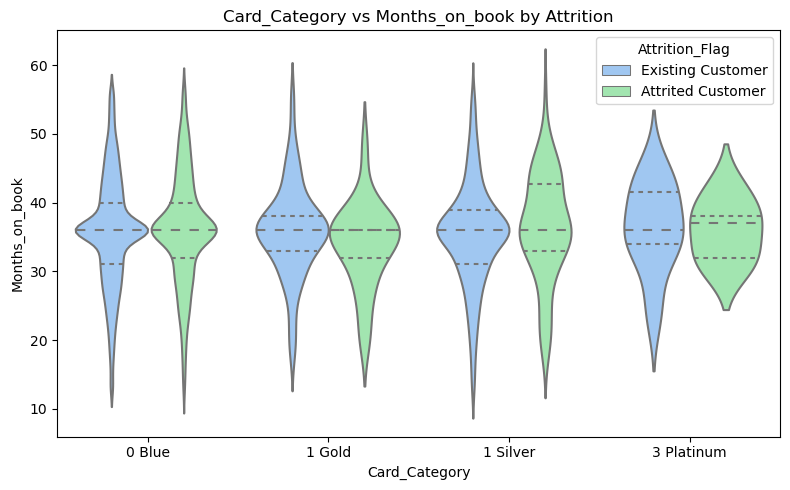

In [ ]:
for col in str_cols[1:] :
  if col != 'Gender' :
    plot_violin(data=df.sort_values(by=col), x=col, y='Months_on_book',hue='Attrition_Flag',split=False)
  else:
    plot_violin(data=df, x=col, y='Months_on_book',hue='Attrition_Flag',split=True)

####**EDA for Total Number of Relationships with Credit Card Provider**

---

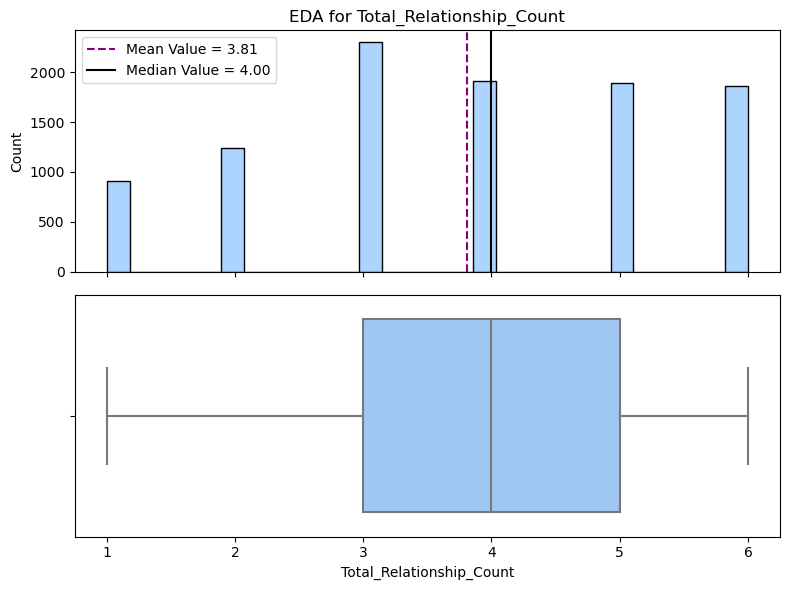

In [ ]:
plot_numeric(df,'Total_Relationship_Count')

* A range from 1 to 6 relationships between bank customers and the credit card provider is a reasonable range.

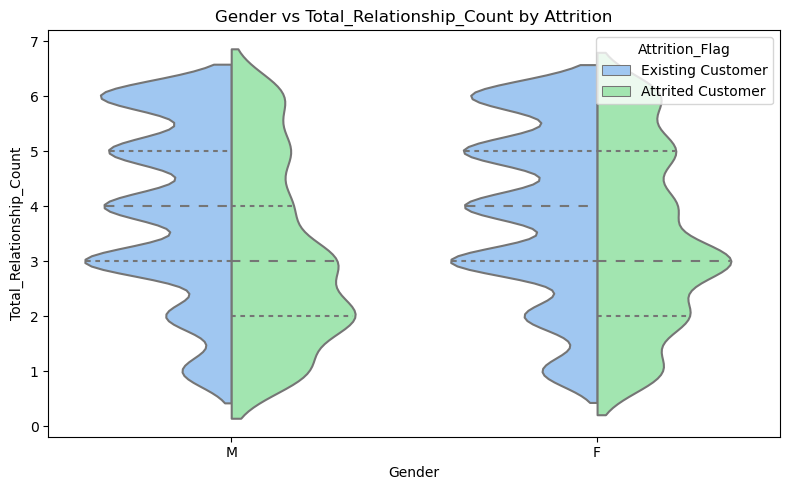

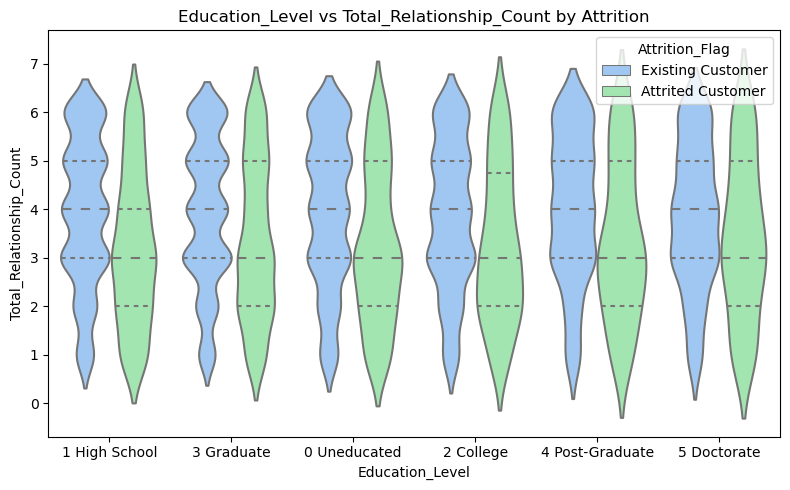

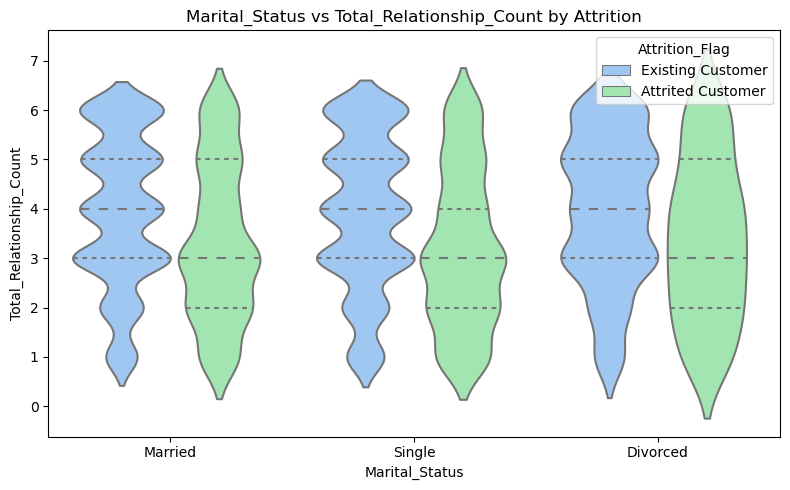

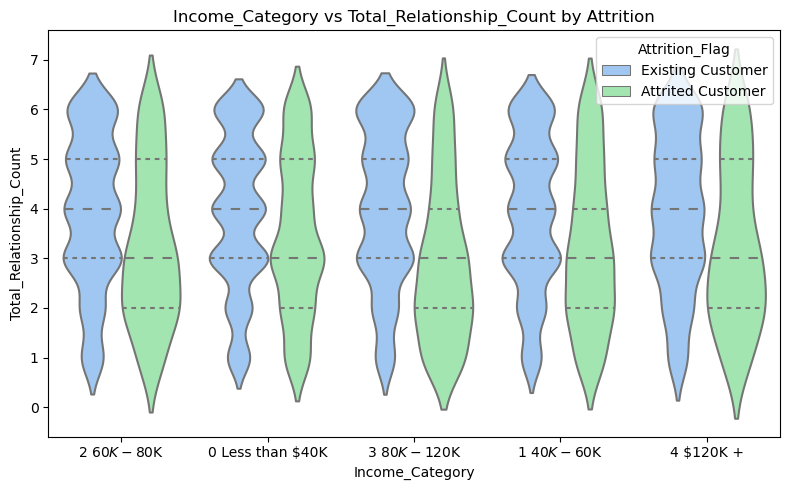

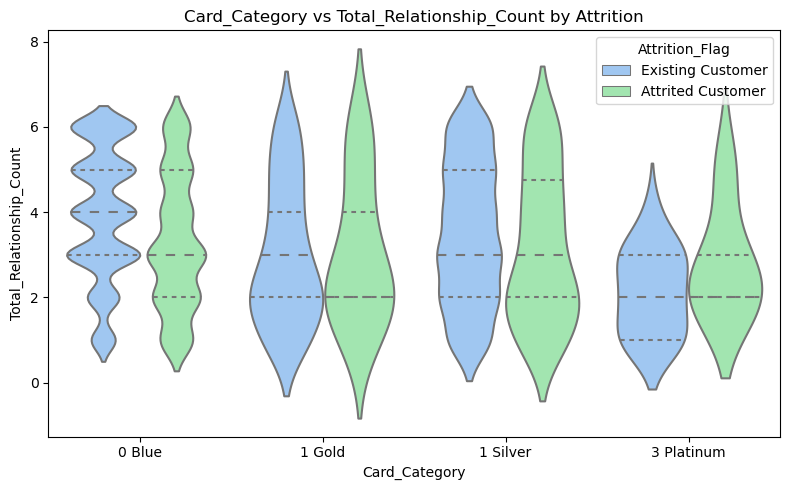

In [ ]:
for col in str_cols[1:] :
  if col != 'Gender' :
    plot_violin(data=df, x=col, y='Total_Relationship_Count',hue='Attrition_Flag',split=False)
  else:
    plot_violin(data=df, x=col, y='Total_Relationship_Count',hue='Attrition_Flag',split=True)

####**EDA for Number of Months Bank Customer was Inactive in Last 12 Months**

---

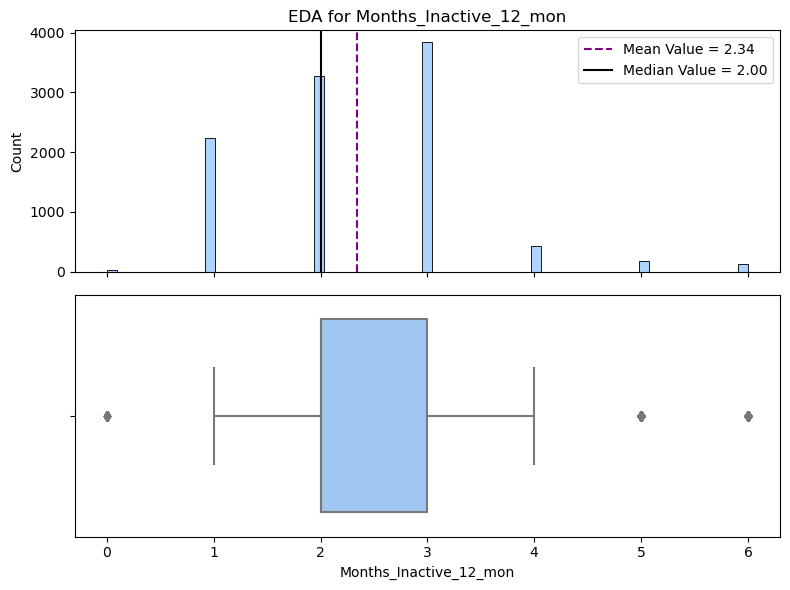

In [ ]:
plot_numeric(df,'Months_Inactive_12_mon')

* Bank customers not active between 0 and 6 months is a reasonable range.

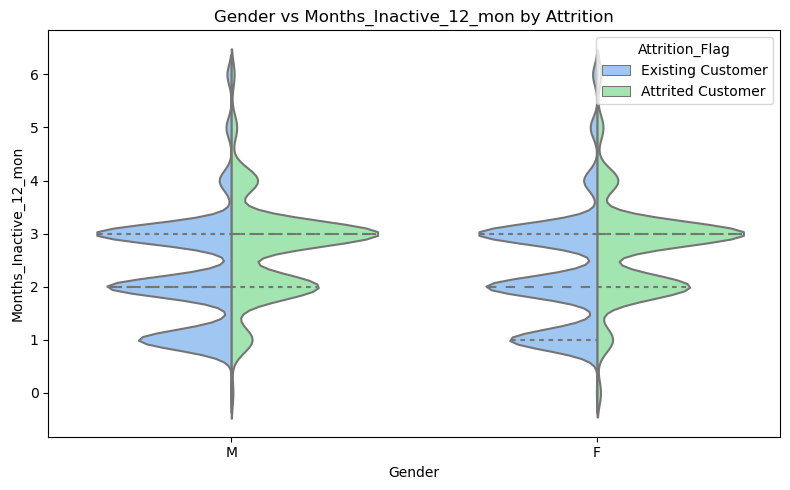

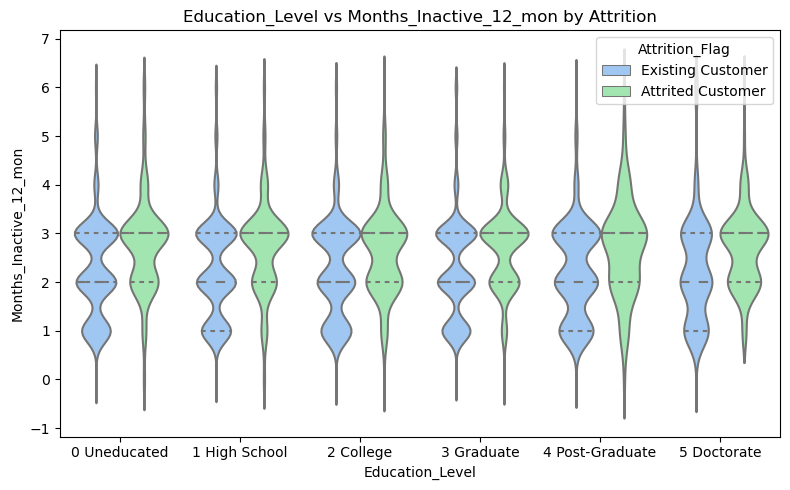

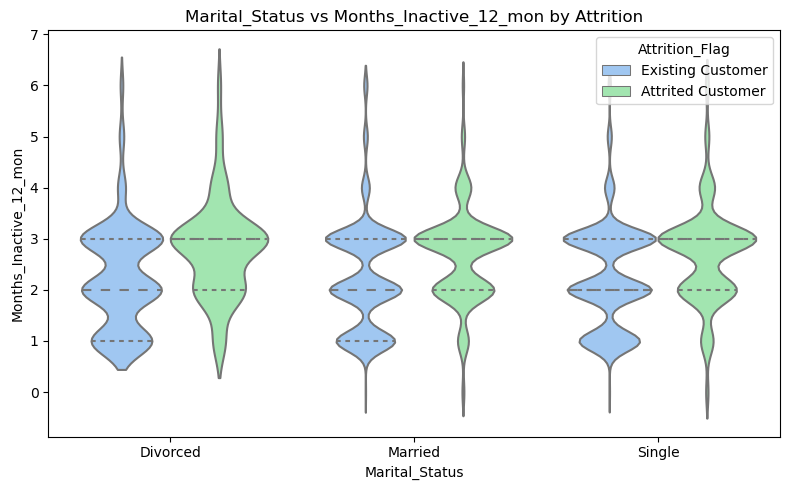

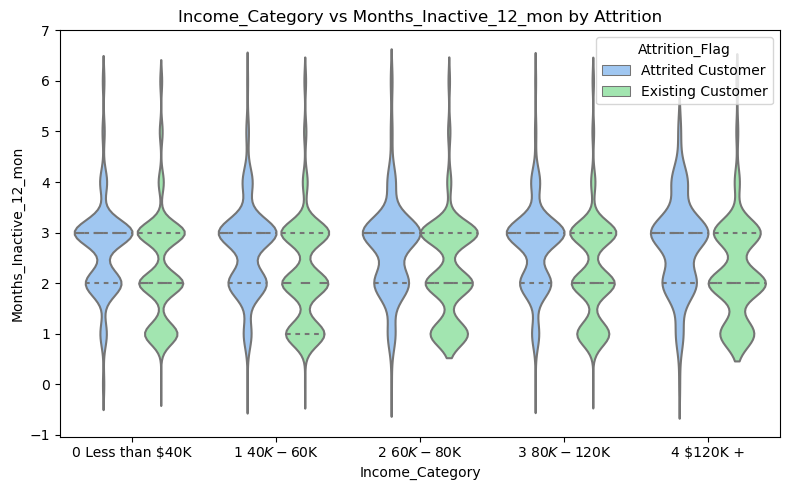

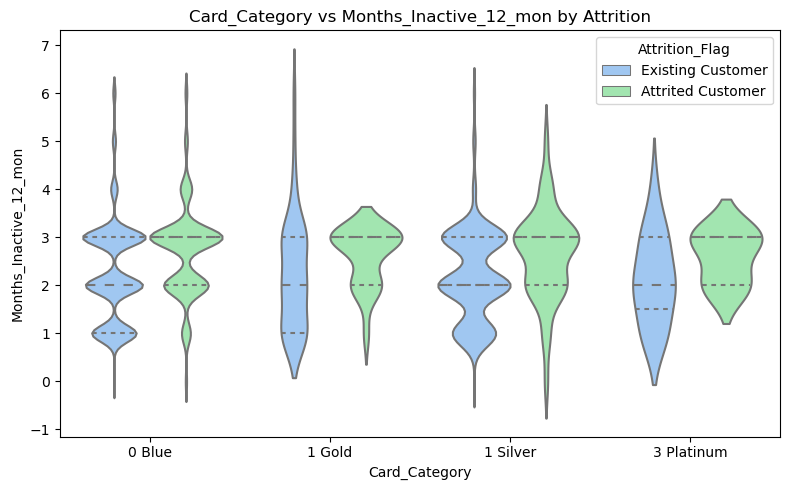

In [ ]:
for col in str_cols[1:] :
  if col != 'Gender' :
    plot_violin(data=df.sort_values(by=col), x=col, y='Months_Inactive_12_mon',hue='Attrition_Flag',split=False)
  else:
    plot_violin(data=df, x=col, y='Months_Inactive_12_mon',hue='Attrition_Flag',split=True)

####**EDA for Number of Contacts Bank Customer had with Bank in Last 12 Months**

---

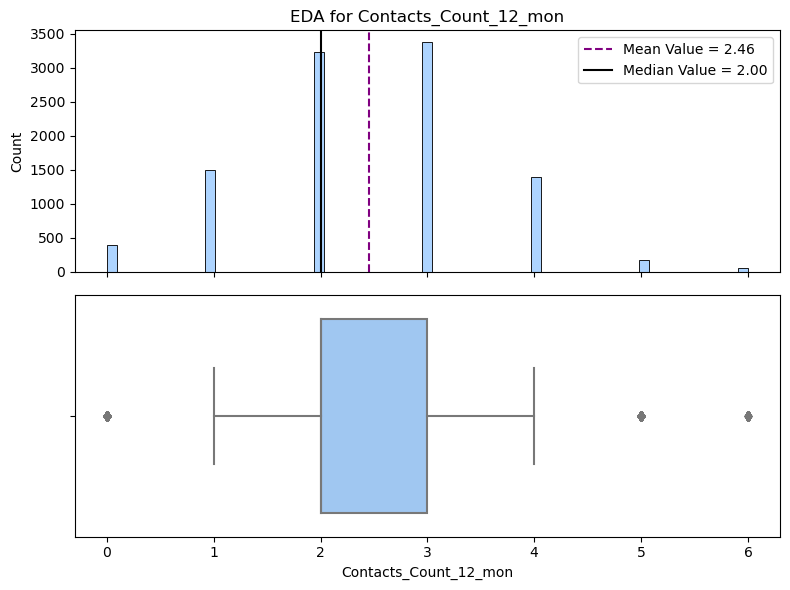

In [ ]:
plot_numeric(df,'Contacts_Count_12_mon')

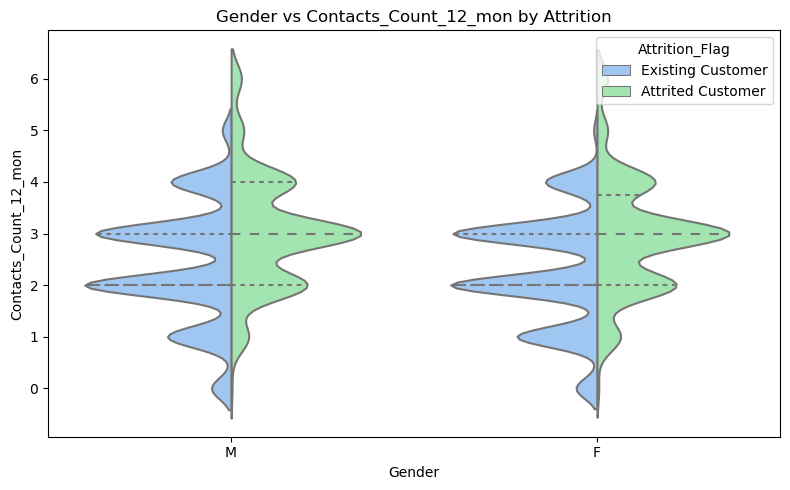

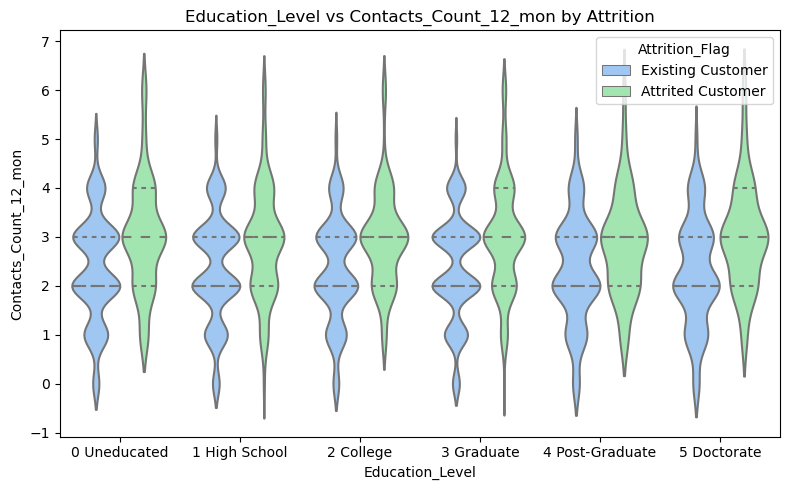

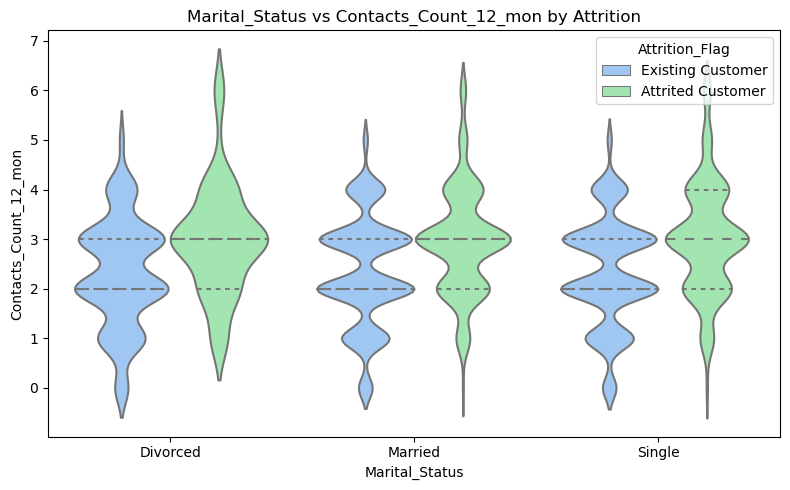

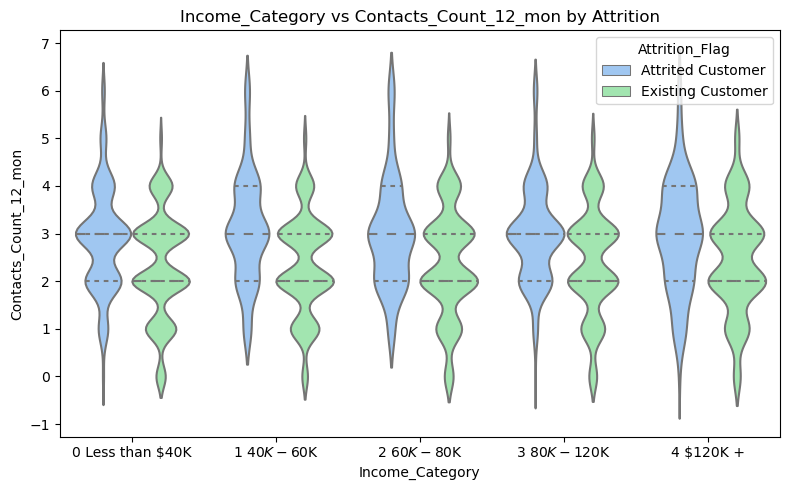

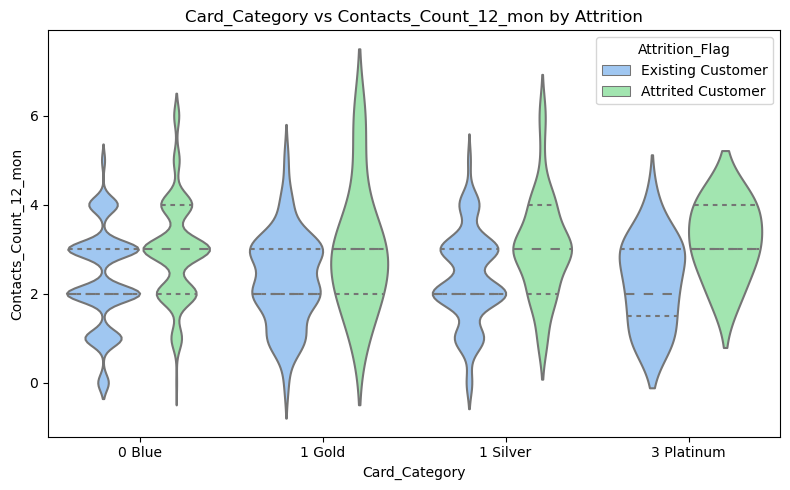

In [ ]:
for col in str_cols[1:] :
  if col != 'Gender' :
    plot_violin(data=df.sort_values(by=col), x=col, y='Contacts_Count_12_mon',hue='Attrition_Flag',split=False)
  else:
    plot_violin(data=df, x=col, y='Contacts_Count_12_mon',hue='Attrition_Flag',split=True)

####**EDA for Credit Limit**

---

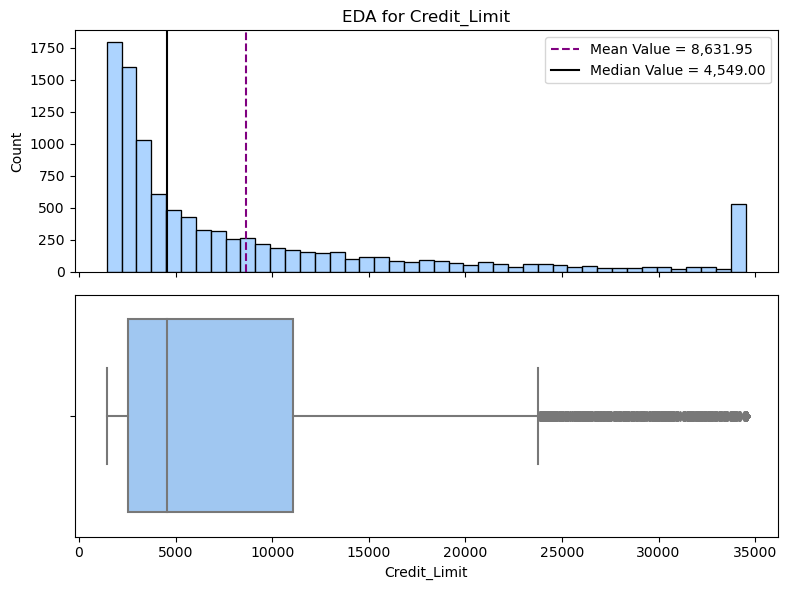

In [ ]:
plot_numeric(df,'Credit_Limit')

* The Credit limit may correspond to the limit for the Blue Card Category, given it is the majority Card category.
* The Higher limits may relate to the higher income card categories.

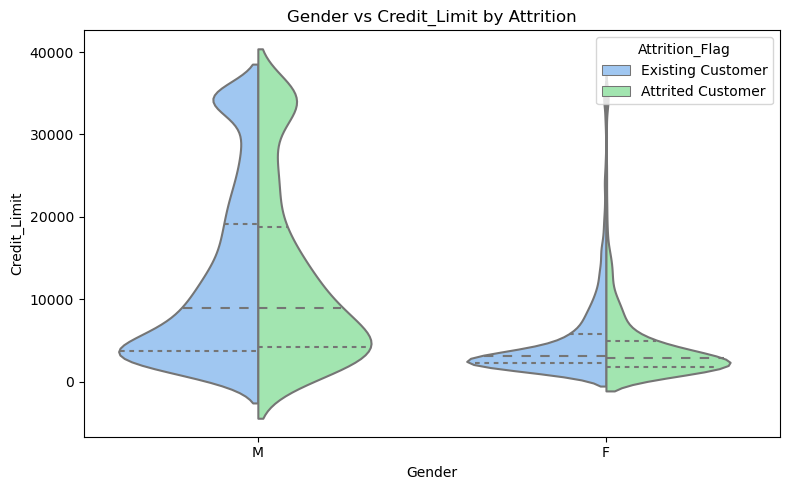

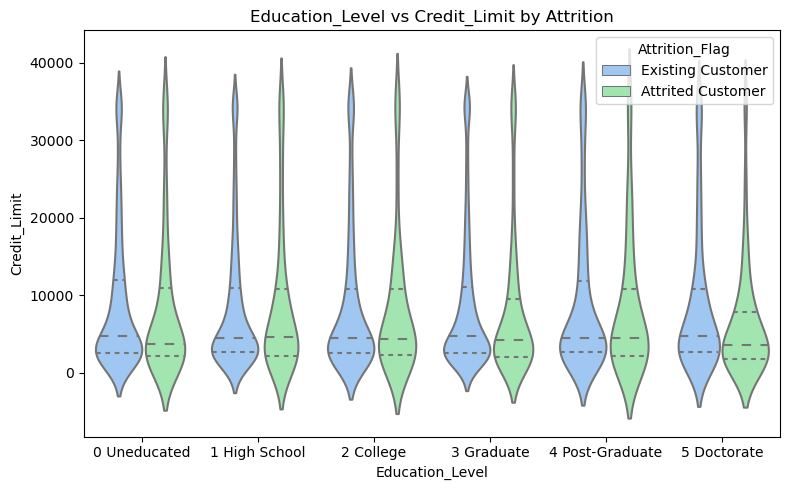

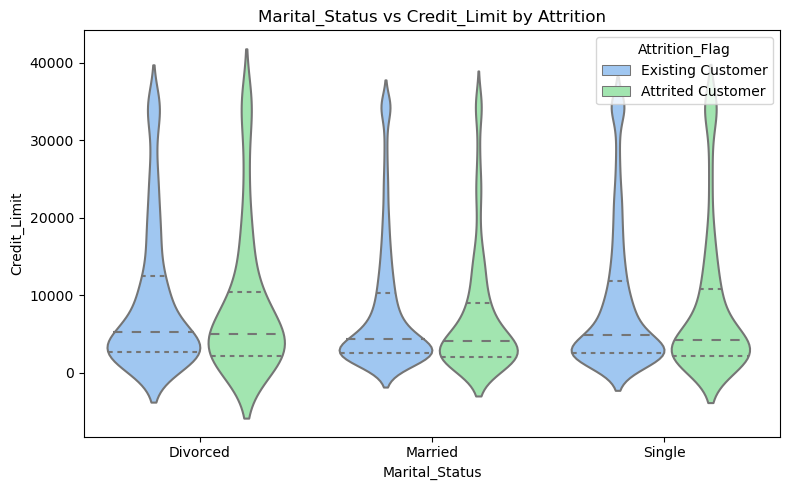

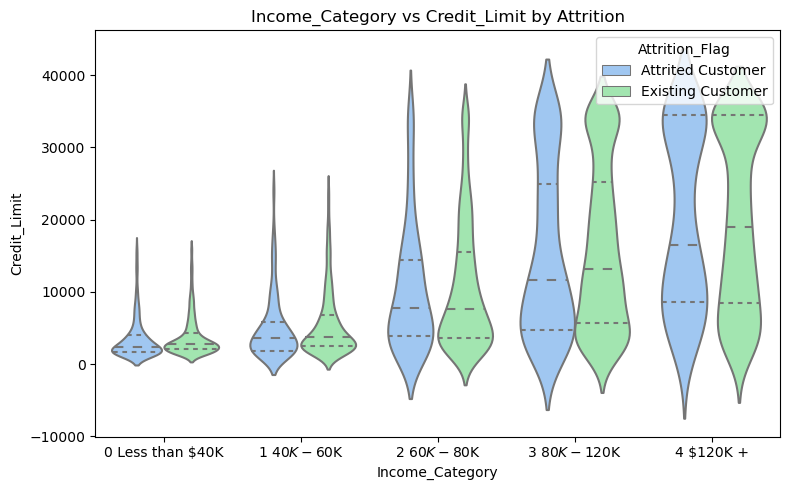

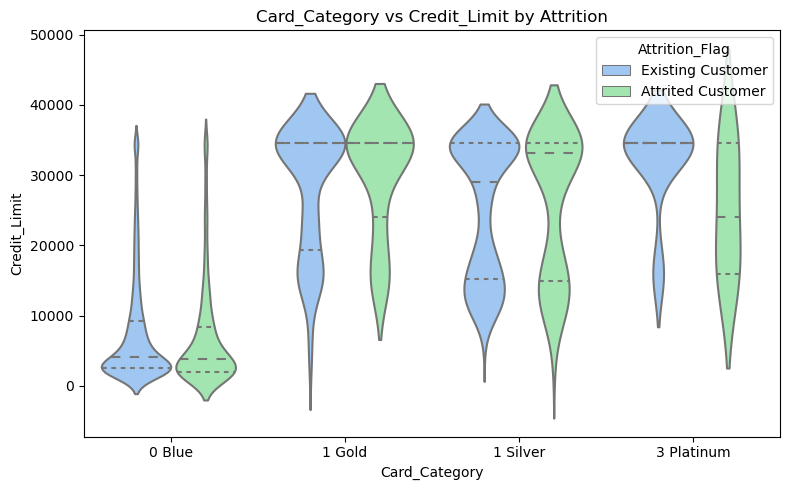

In [ ]:
for col in str_cols[1:] :
  if col != 'Gender' :
    plot_violin(data=df.sort_values(by=col), x=col, y='Credit_Limit',hue='Attrition_Flag',split=False)
  else:
    plot_violin(data=df, x=col, y='Credit_Limit',hue='Attrition_Flag',split=True)

####**EDA for Total Revolving Balance**

---

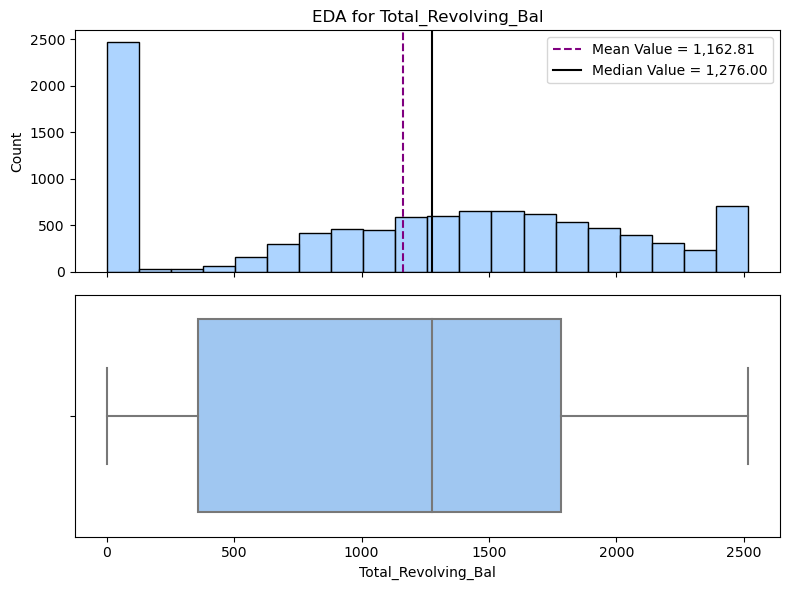

In [ ]:
plot_numeric(df,'Total_Revolving_Bal')

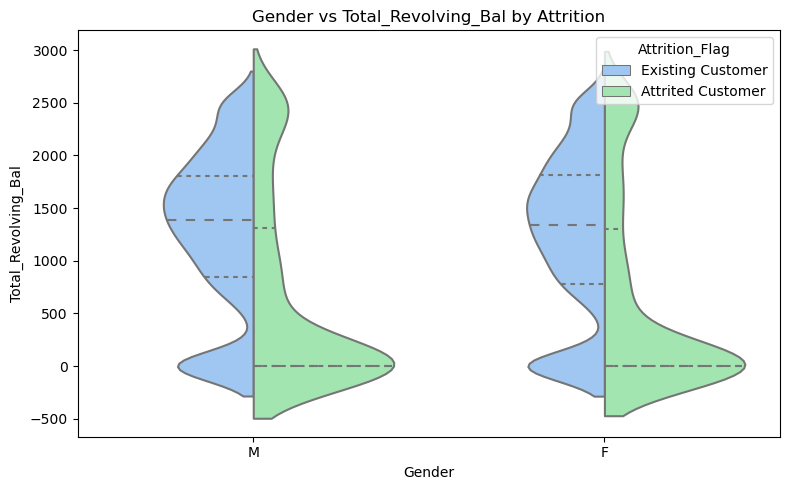

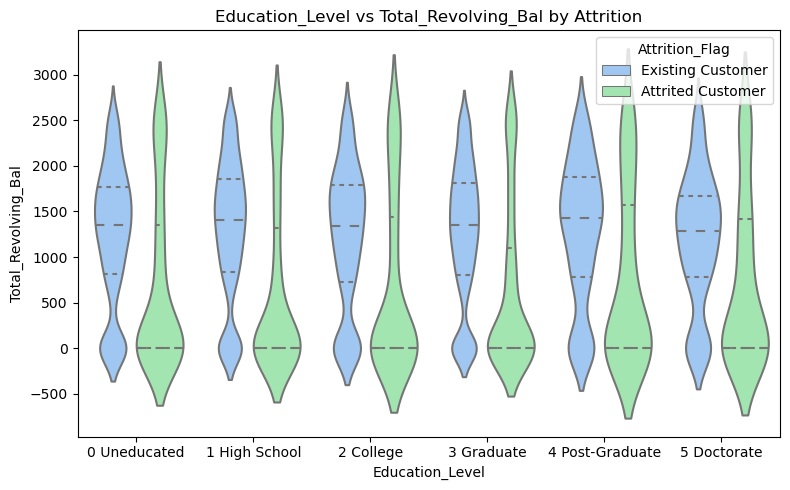

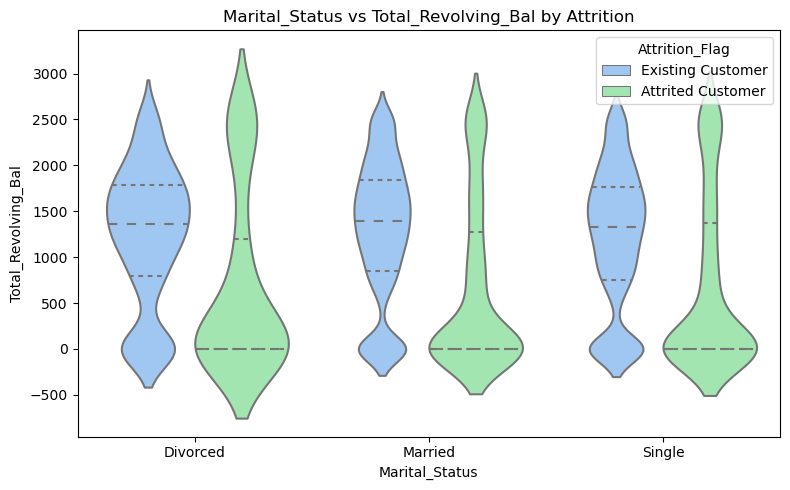

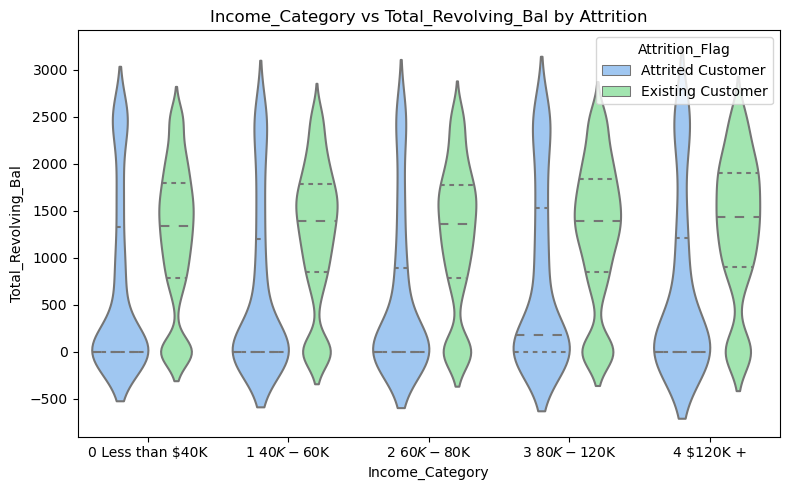

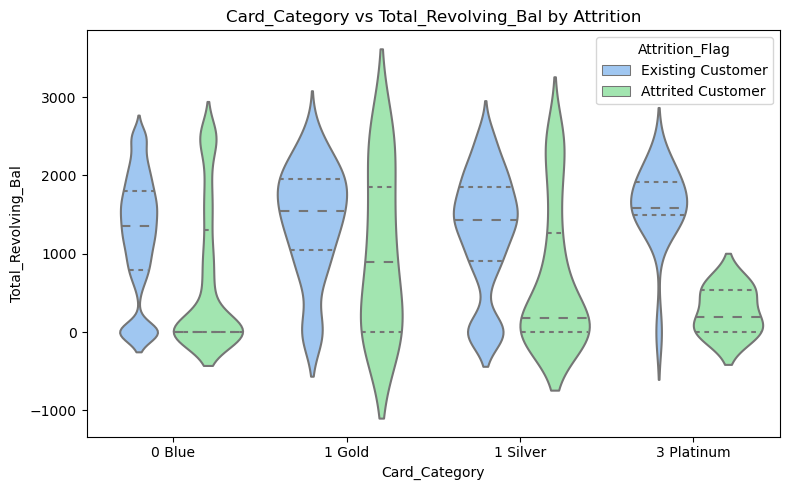

In [ ]:
for col in str_cols[1:] :
  if col != 'Gender' :
    plot_violin(data=df.sort_values(by=col), x=col, y='Total_Revolving_Bal',hue='Attrition_Flag',split=False)
  else:
    plot_violin(data=df, x=col, y='Total_Revolving_Bal',hue='Attrition_Flag',split=True)

* Credit card customers who do not carry a balance tend to exit the credit card.
* Higher Total Revolving Balances have more attrition.

####**EDA for Average Open to Buy Ratio**

---

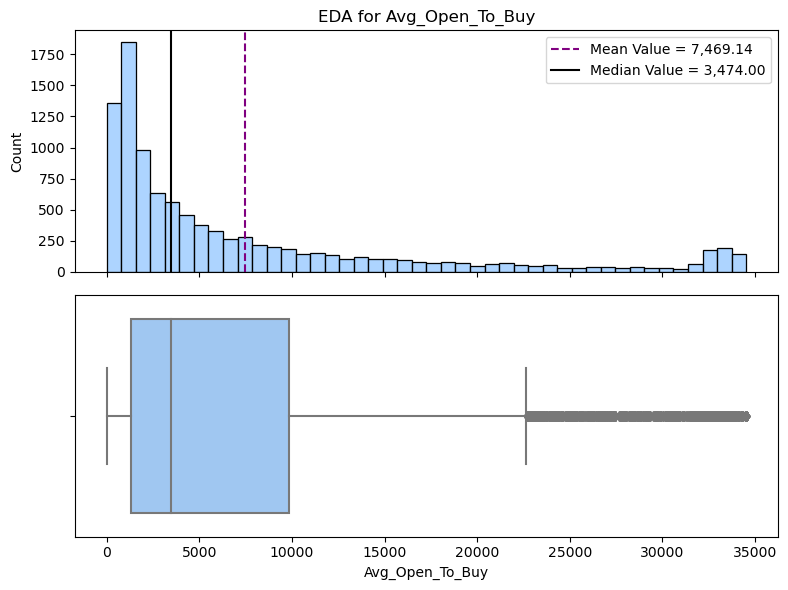

In [ ]:
plot_numeric(df,'Avg_Open_To_Buy')

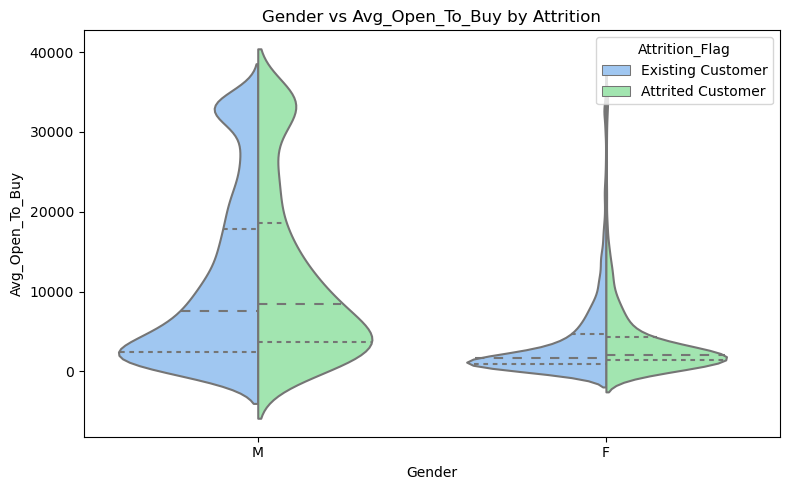

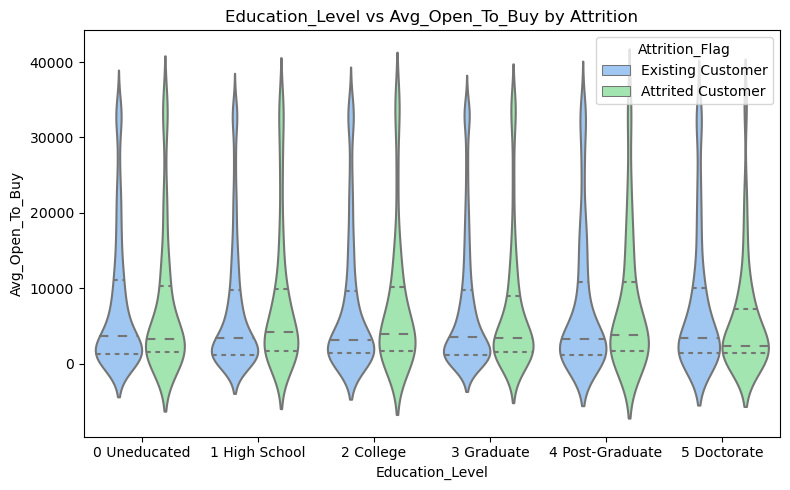

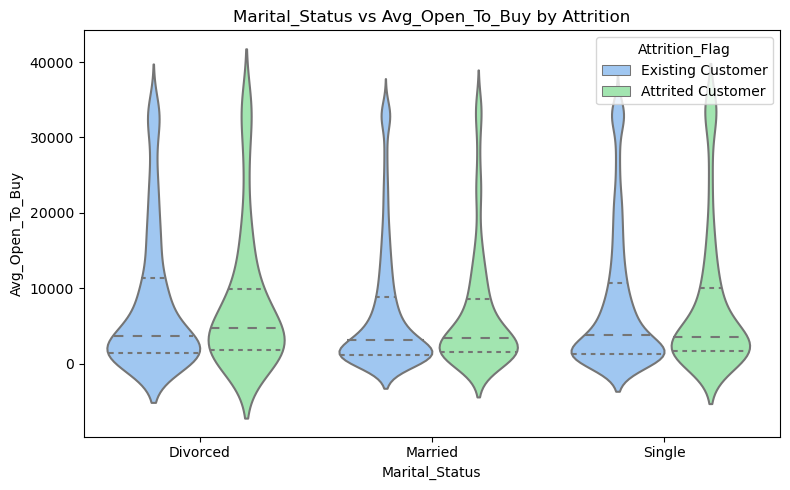

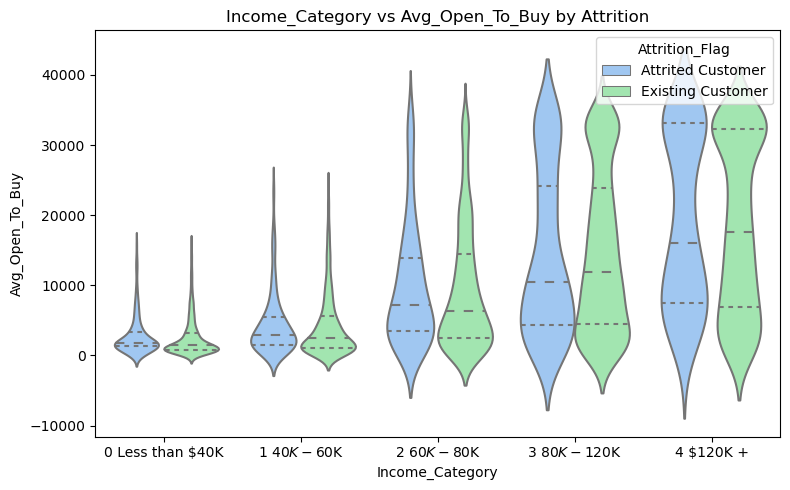

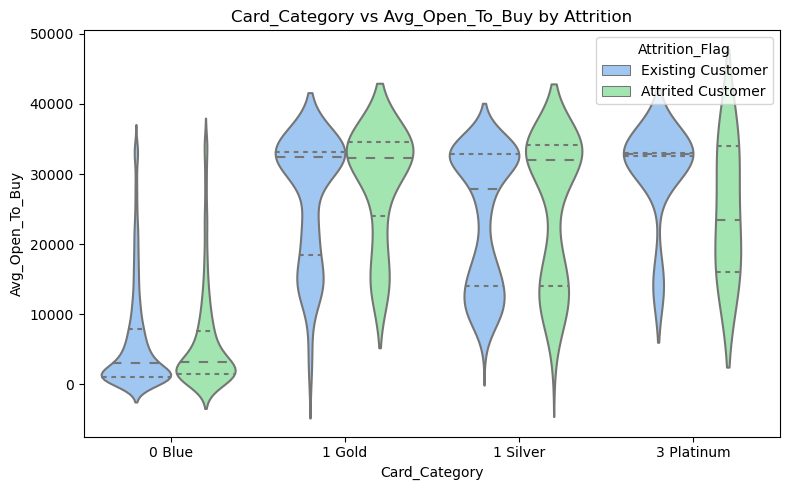

In [ ]:
for col in str_cols[1:] :
  if col != 'Gender' :
    plot_violin(data=df.sort_values(by=col), x=col, y='Avg_Open_To_Buy',hue='Attrition_Flag',split=False)
  else:
    plot_violin(data=df, x=col, y='Avg_Open_To_Buy',hue='Attrition_Flag',split=True)

* Card members with more Avg amount open to buy exit the credit card company.

####**EDA for Total Amount of Change from Q4 to Q1**

---

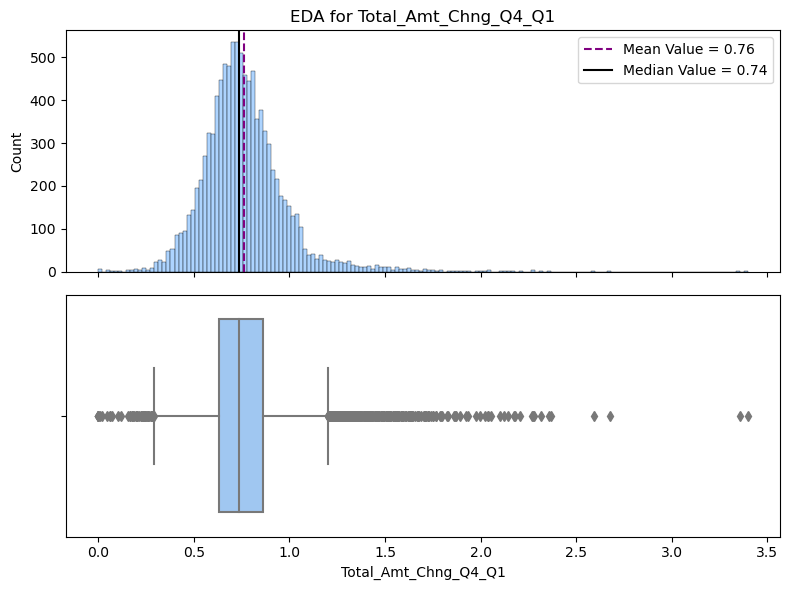

In [ ]:
plot_numeric(df,'Total_Amt_Chng_Q4_Q1')

####**EDA for Total Transaction Amount**

---

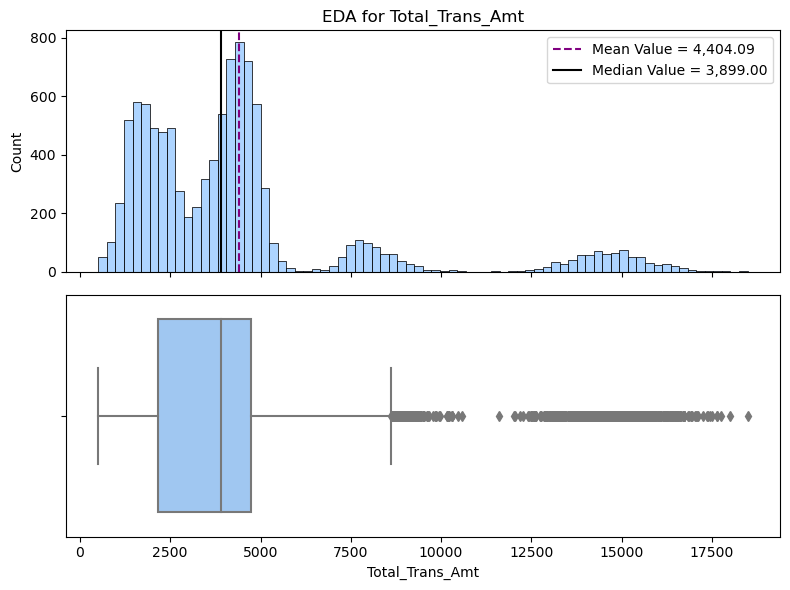

In [ ]:
plot_numeric(df,'Total_Trans_Amt')

####**EDA for Total Transaction Count**

---

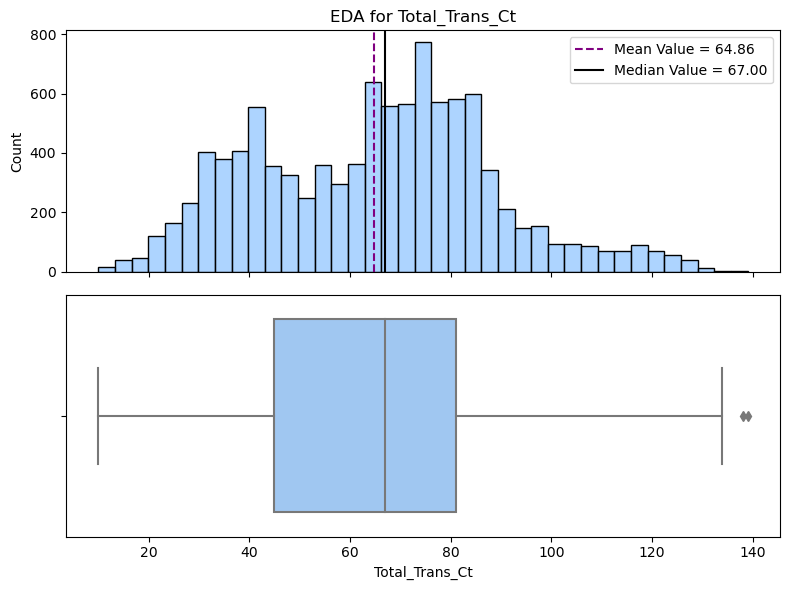

In [ ]:
plot_numeric(df,'Total_Trans_Ct')

####**EDA for Total Count Change from Q4 to Q1**

---

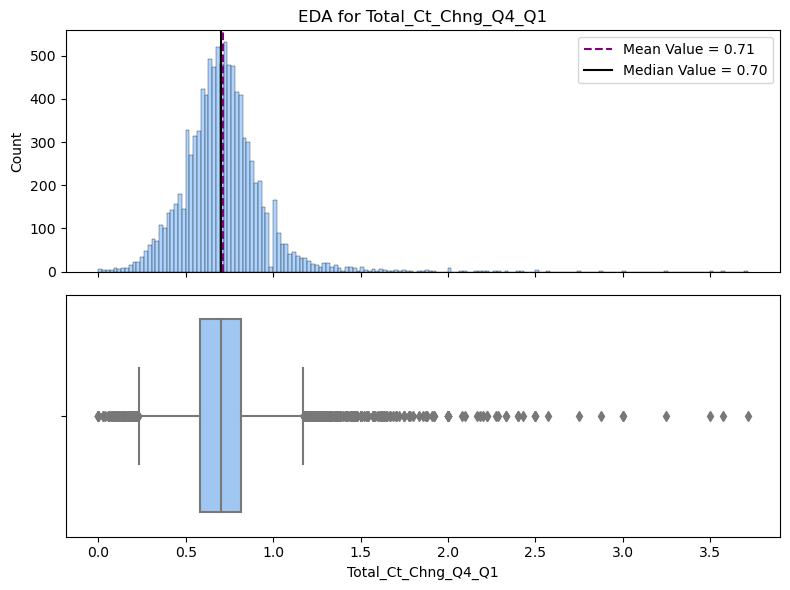

In [ ]:
plot_numeric(df,'Total_Ct_Chng_Q4_Q1')

####**EDA for Average Utilization Ratio**

---

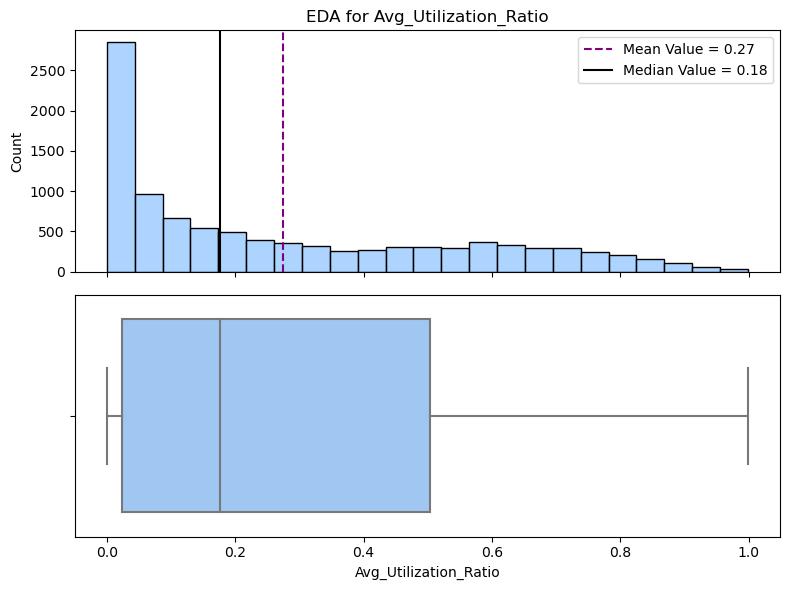

In [ ]:
plot_numeric(df,'Avg_Utilization_Ratio')

* Average utilization ratio is 27%.
* It would be good to compare those that exited bank to those who stayed with the bank.

##**Categorical EDA**

---



In [ ]:
# create function to plot a Countplot with hue of bank customers who churned
def plot_count(data,x,hue,figsize=(10,5)):
  # sets the figure size
  fig, ax = plt.subplots(figsize=figsize)
  
  # determine the value counts for each category, sort in descending order
  #counts = df[x].value_counts().sort_values(ascending=False).to_frame()

  # plot barplot
  sns.countplot(data=data, x=x, hue=hue,ax=ax)

  # show x axis labels at 0 degrees so don't run together
  plt.xticks(rotation=0)
  # set title, x axis , & y axis
  ax.set_title(f'Bank Customer Attrition By {x}',fontsize=20, fontweight='bold');
  ax.set_xlabel(f'{x}', fontsize=15, fontweight = 'bold')
  ax.set_ylabel('Counts',fontsize=15, fontweight='bold')
  
  return fig,ax

In [ ]:
# find numerical column names
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

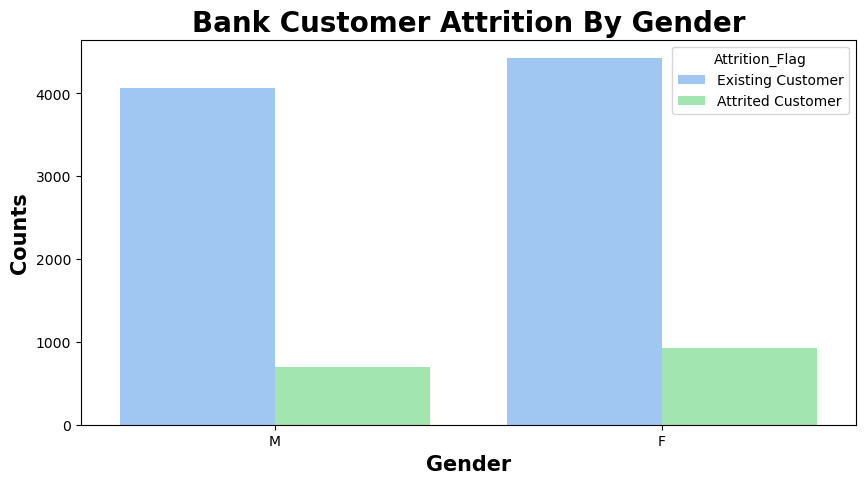

F    0.529081
M    0.470919
Name: Gender, dtype: float64


In [ ]:
# plot Gender by Attrition Flag
fig, ax = plot_count(df, x='Gender',hue='Attrition_Flag');
plt.show()
print(df['Gender'].value_counts(normalize=True))

* Split of men to women who exited bank seems fairly balanced.

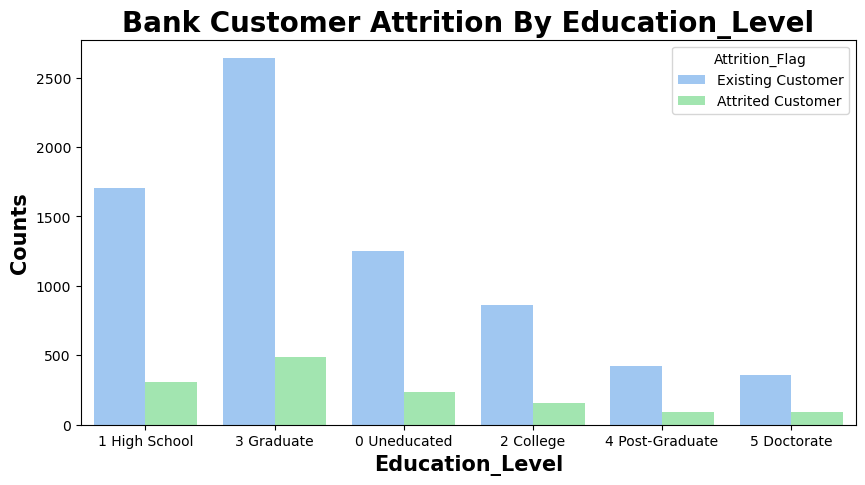

3 Graduate         0.363383
1 High School      0.233852
0 Uneducated       0.172746
2 College          0.117681
4 Post-Graduate    0.059944
5 Doctorate        0.052393
Name: Education_Level, dtype: float64


In [ ]:
# plot Education Level by Attrition Flag
fig, ax = plot_count(df, x='Education_Level',hue='Attrition_Flag');
plt.show()
print(df['Education_Level'].value_counts(normalize=True))

* Attrition of bank customers also appears not affected by Education Level.

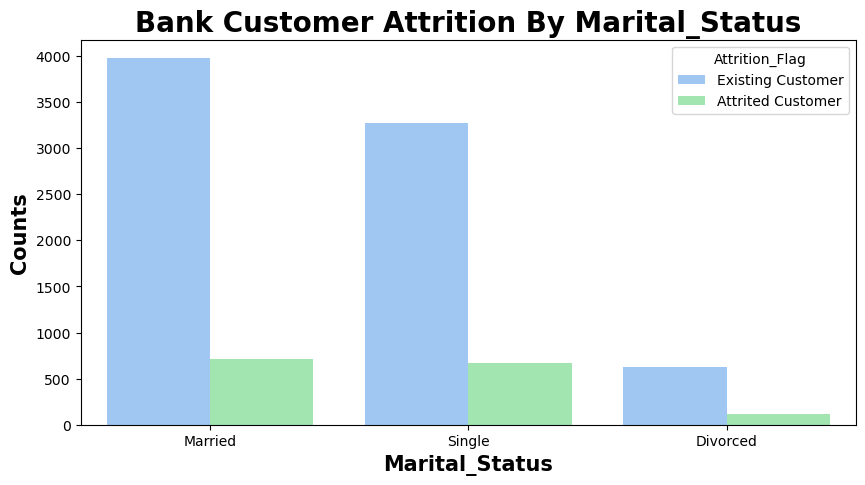

Married     0.499787
Single      0.420452
Divorced    0.079761
Name: Marital_Status, dtype: float64


In [ ]:
# plot Marital Status by Attrition Flag
fig, ax = plot_count(df, x='Marital_Status',hue='Attrition_Flag');
plt.show()
print(df['Marital_Status'].value_counts(normalize=True))

* Look into whether Divorced seems to affect bank churn.

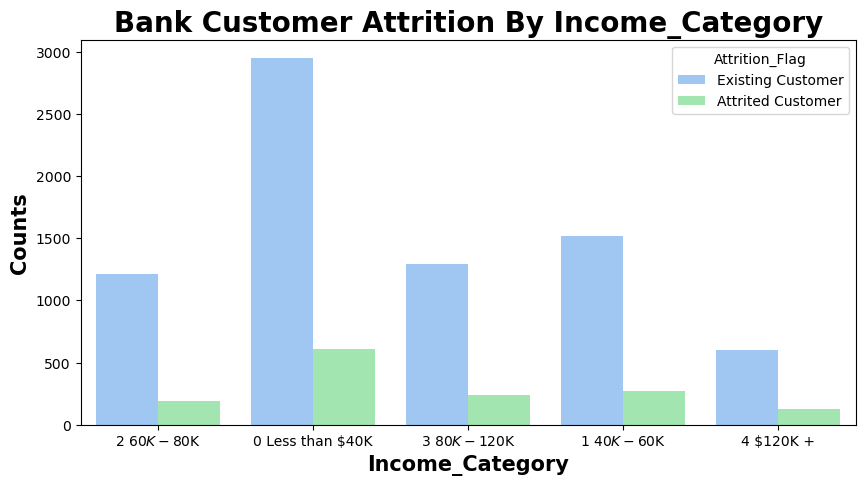

0 Less than $40K    0.395008
1 $40K - $60K       0.198558
3 $80K - $120K      0.170272
2 $60K - $80K       0.155519
4 $120K +           0.080643
Name: Income_Category, dtype: float64


In [ ]:
# plot Income Category by Attrition Flag
fig, ax = plot_count(df, x='Income_Category',hue='Attrition_Flag');
plt.show()
print(df['Income_Category'].value_counts(normalize=True))

* Income category does not seem to correlate with bank churn.

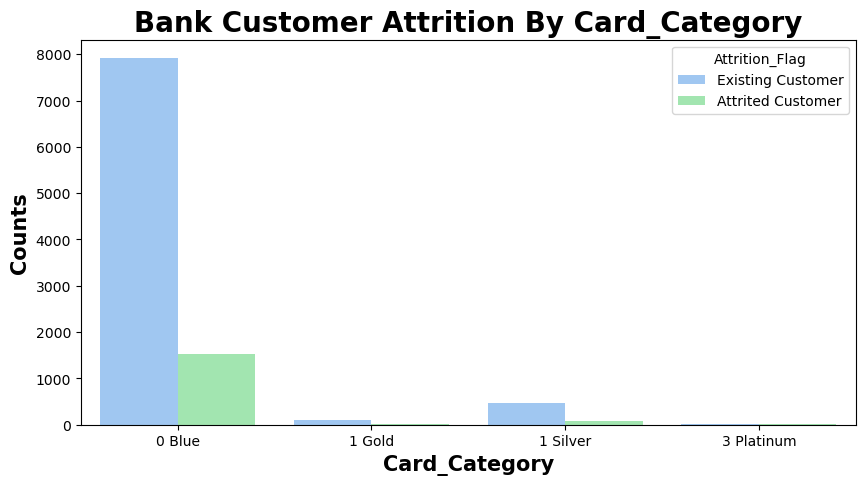

0 Blue        0.931767
1 Silver      0.054804
1 Gold        0.011455
3 Platinum    0.001975
Name: Card_Category, dtype: float64


In [ ]:
# plot Card Category by Attrition Flag
fig, ax = plot_count(df, x='Card_Category',hue='Attrition_Flag');
plt.show()
print(df['Card_Category'].value_counts(normalize=True))

* The Blue Credit Card is the predominant card category, and reflects amount, not correlation to bank churn.
<br />
<br />
<br />

#**Multi-variate EDA & Explanatory Data Analysis: Part 3** <a name = "Multi-variate EDA & Explanatory Data Analysis: Part 3">

---


##**Assignment: Project 2 - Part 3**

*(Note: You are not clustering your data for this assignment.)*

1. For this part of the project, you will continue your data exploration by:
   *  Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

   * Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.

2. Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience. ***(Neither of these should be histograms, boxplots, or correlation plots)***.
   * These plots should be so simple, and so easy to read, that a 6th grader could understand them in less than 10 seconds without asking questions.  They don't need to be fancy, they need to CLEARLY show an interesting trend or correlation between features in your data.

###**1 Correlation Heatmap**

In [ ]:
num_cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Class_Inactive_1Year_Flag',
       'Naive_Bayes_Class_Inactive_2Year_Flag'],
      dtype='object')

C:\Users\sweet\AppData\Local\Temp\ipykernel_18748\5489814.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Purples');


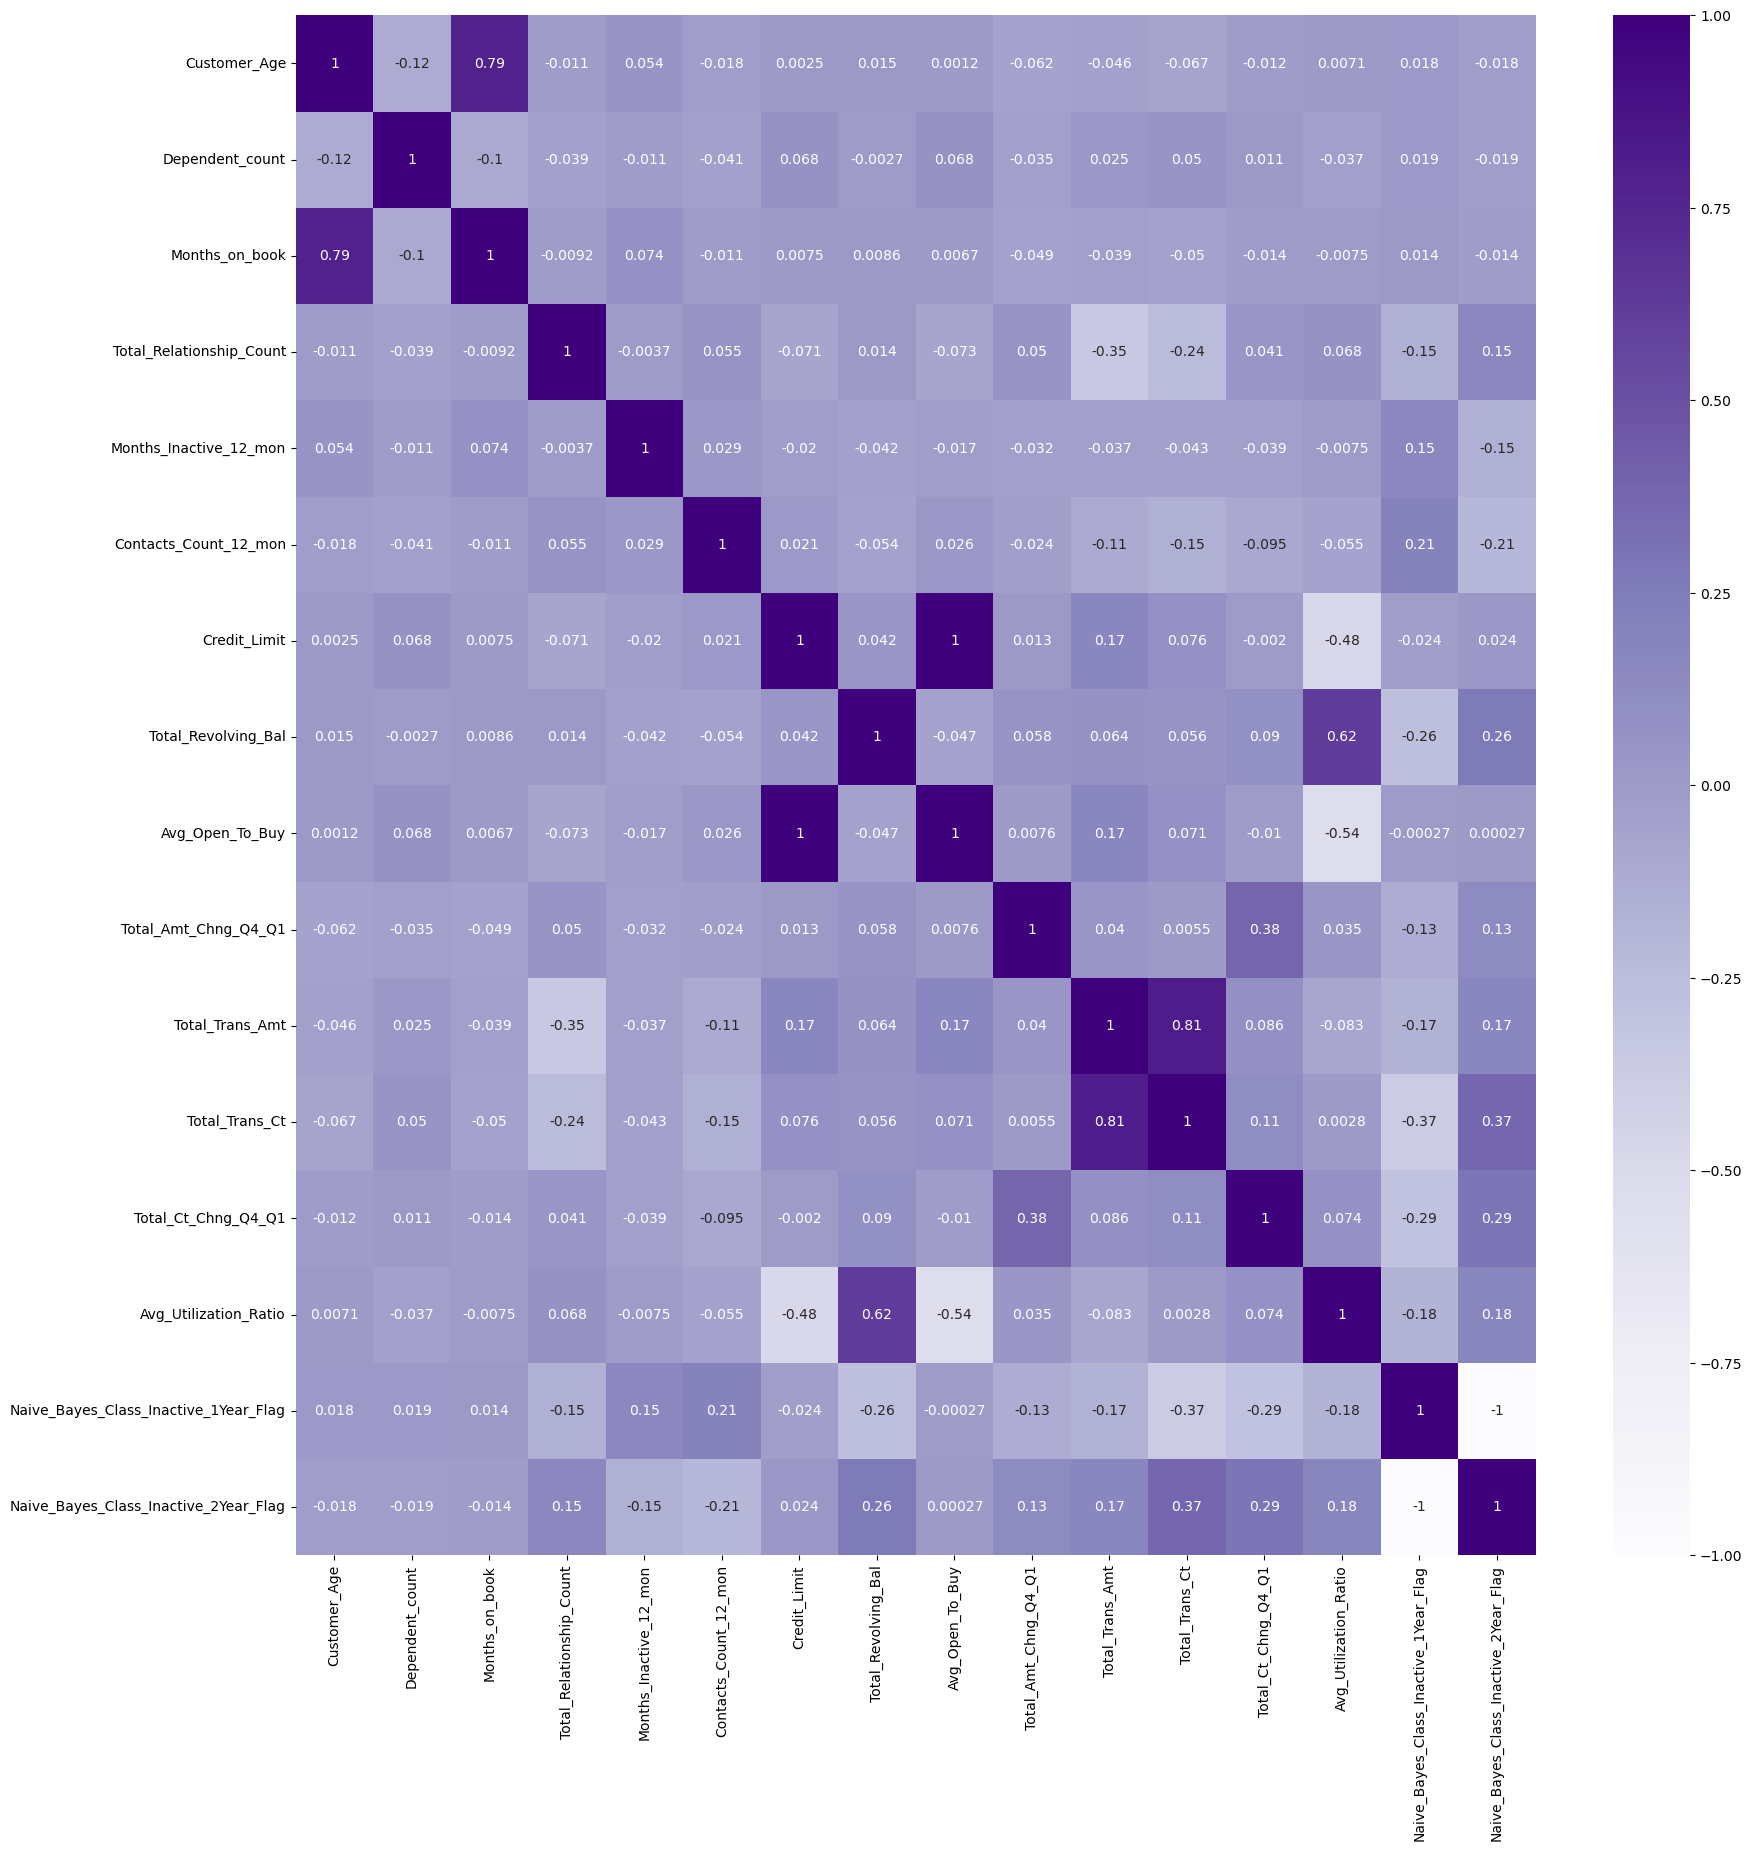

In [ ]:
fig, axes = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Purples');

* #### 1 Average Utilization Ratio and Total Revolving Balance have a strong correlation.
* #### 2 Average Dollar Amount Available to Buy Ratio and Average Utilization Ratio have a moderately strong correlation.
* #### 3 Credit Limit and Average Available to Buy Ratio have a moderately strong correlation.

###**1 Average Utilization Ratio vs Total Revolving Balance**

In [ ]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Class_Inactive_1Year_Flag',
       'Naive_Bayes_Class_Inactive_2Year_Flag'],
      dtype='object')

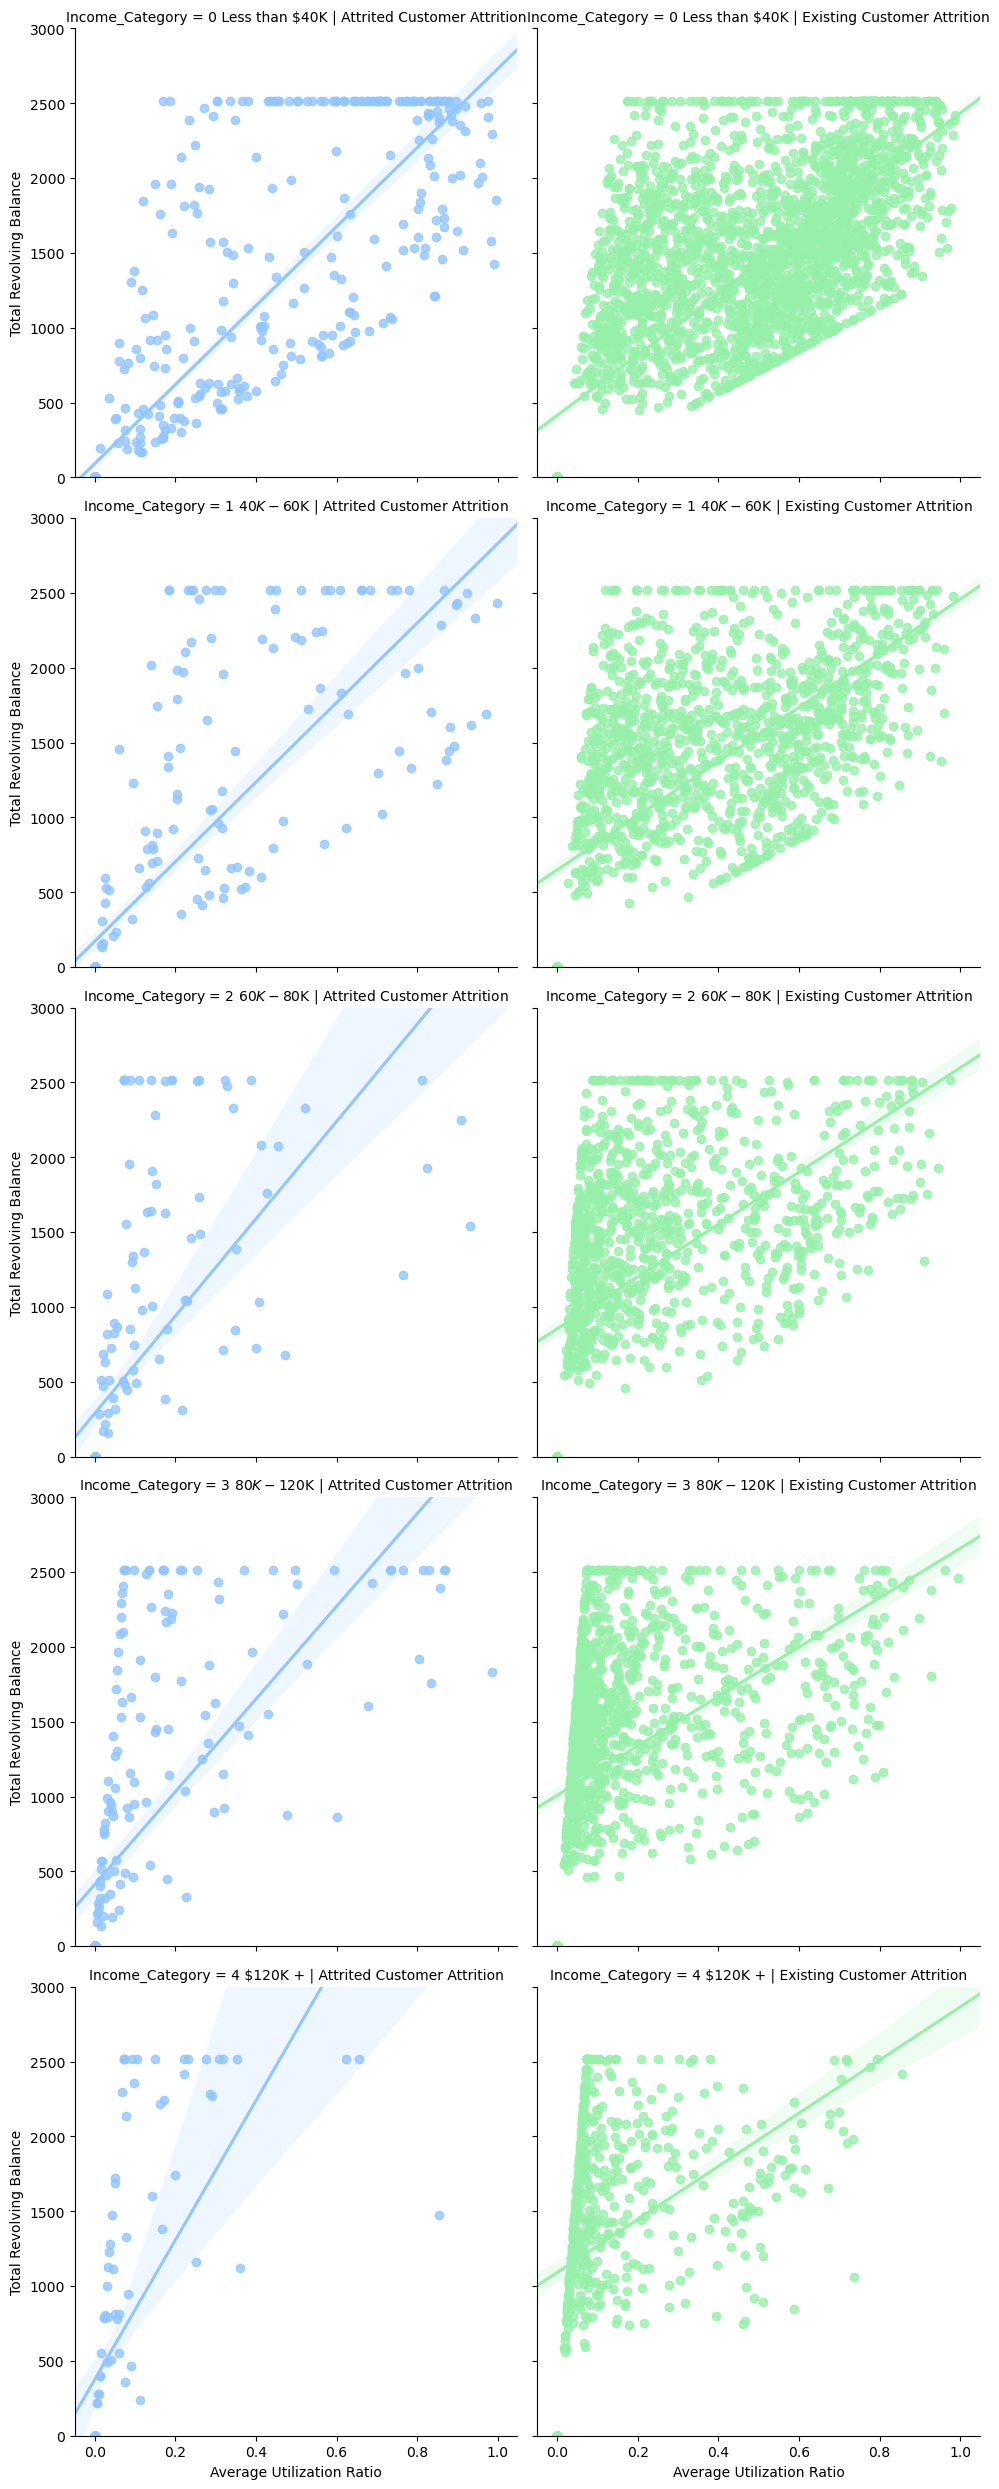

In [ ]:
g = sns.lmplot(data=df.sort_values(by='Income_Category'),x='Avg_Utilization_Ratio',  y='Total_Revolving_Bal',hue='Attrition_Flag', col='Attrition_Flag', row='Income_Category',truncate=False);
g.set_titles(col_template='{col_name} Attrition');
g.set_ylabels('Total Revolving Balance');
g.set_xlabels('Average Utilization Ratio');
plt.ylim(0, 3000);

(0.0, 3000.0)

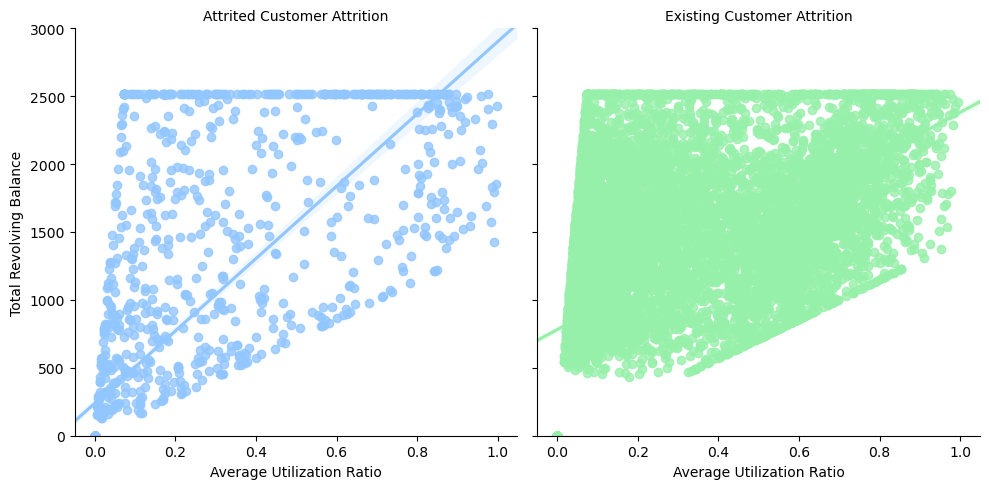

In [ ]:
i = sns.lmplot(data=df.sort_values(by='Income_Category'),x='Avg_Utilization_Ratio',  y='Total_Revolving_Bal',hue='Attrition_Flag', col='Attrition_Flag',truncate=False);
i.set_titles(col_template='{col_name} Attrition');
i.set_ylabels('Total Revolving Balance');
i.set_xlabels('Average Utilization Ratio');
plt.ylim(0,3000)

### **2 Average Dollar Amount Available to Buy Ratio vs. Average Utilization Ratio**

In [ ]:
# group average utilization ratio by income category
attrition_income_df = attrition_df.groupby('Income_Category').mean().reset_index()
attrition_income_df


C:\Users\sweet\AppData\Local\Temp\ipykernel_18748\956376889.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  attrition_income_df = attrition_df.groupby('Income_Category').mean().reset_index()


Income_Category  Customer_Age  Dependent_count  Months_on_book  \
0  0 Less than $40K     46.428105         2.318627       36.039216   
1     1 $40K - $60K     45.981550         2.439114       35.774908   
2     2 $60K - $80K     46.301587         2.449735       36.074074   
3    3 $80K - $120K     47.033058         2.586777       36.322314   
4         4 $120K +     47.873016         2.428571       36.849206   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  3.468954                2.678105               2.877451   
1                  3.239852                2.682657               3.099631   
2                  3.243386                2.693122               3.000000   
3                  2.913223                2.698347               2.962810   
4                  3.246032                2.746032               2.960317   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0   3483.306536           686.114379      2797.192157              0.686773   
1   5049.799262           634.745387      4415.053875              0.677406   
2  10491.971958           569.201058      9922.770899              0.705540   
3  15296.733058           758.619835     14538.113223              0.712215   
4  19734.380952           677.833333     19056.547619              0.703619   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0      2865.243464       44.196078             0.543116   
1      2992.726937       44.612546             0.559214   
2      3246.380952       44.835979             0.575688   
3      3740.615702       47.471074             0.578798   
4      3393.071429       45.650794             0.557754   

   Avg_Utilization_Ratio  Naive_Bayes_Class_Inactive_1Year_Flag  \
0               0.224935                               0.994612   
1               0.173985                               0.995289   
2               0.086090                               0.994991   
3               0.111640                               0.995172   
4               0.064532                               0.994776   

   Naive_Bayes_Class_Inactive_2Year_Flag  
0                               0.005388  
1                               0.004711  
2                               0.005009  
3                               0.004828  
4                               0.005223

In [ ]:
existing_income_df = attrition_df.groupby('Income_Category').mean().reset_index()
existing_income_df

C:\Users\sweet\AppData\Local\Temp\ipykernel_18748\2448215703.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  existing_income_df = attrition_df.groupby('Income_Category').mean().reset_index()


Income_Category  Customer_Age  Dependent_count  Months_on_book  \
0  0 Less than $40K     46.428105         2.318627       36.039216   
1     1 $40K - $60K     45.981550         2.439114       35.774908   
2     2 $60K - $80K     46.301587         2.449735       36.074074   
3    3 $80K - $120K     47.033058         2.586777       36.322314   
4         4 $120K +     47.873016         2.428571       36.849206   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  3.468954                2.678105               2.877451   
1                  3.239852                2.682657               3.099631   
2                  3.243386                2.693122               3.000000   
3                  2.913223                2.698347               2.962810   
4                  3.246032                2.746032               2.960317   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0   3483.306536           686.114379      2797.192157              0.686773   
1   5049.799262           634.745387      4415.053875              0.677406   
2  10491.971958           569.201058      9922.770899              0.705540   
3  15296.733058           758.619835     14538.113223              0.712215   
4  19734.380952           677.833333     19056.547619              0.703619   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0      2865.243464       44.196078             0.543116   
1      2992.726937       44.612546             0.559214   
2      3246.380952       44.835979             0.575688   
3      3740.615702       47.471074             0.578798   
4      3393.071429       45.650794             0.557754   

   Avg_Utilization_Ratio  Naive_Bayes_Class_Inactive_1Year_Flag  \
0               0.224935                               0.994612   
1               0.173985                               0.995289   
2               0.086090                               0.994991   
3               0.111640                               0.995172   
4               0.064532                               0.994776   

   Naive_Bayes_Class_Inactive_2Year_Flag  
0                               0.005388  
1                               0.004711  
2                               0.005009  
3                               0.004828  
4                               0.005223

In [ ]:
attrition_income_df = attrition_income_df.sort_values(by='Avg_Utilization_Ratio',ascending=False)
attrition_income_df

Income_Category  Customer_Age  Dependent_count  Months_on_book  \
0  0 Less than $40K     46.428105         2.318627       36.039216   
1     1 $40K - $60K     45.981550         2.439114       35.774908   
3    3 $80K - $120K     47.033058         2.586777       36.322314   
2     2 $60K - $80K     46.301587         2.449735       36.074074   
4         4 $120K +     47.873016         2.428571       36.849206   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  3.468954                2.678105               2.877451   
1                  3.239852                2.682657               3.099631   
3                  2.913223                2.698347               2.962810   
2                  3.243386                2.693122               3.000000   
4                  3.246032                2.746032               2.960317   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0   3483.306536           686.114379      2797.192157              0.686773   
1   5049.799262           634.745387      4415.053875              0.677406   
3  15296.733058           758.619835     14538.113223              0.712215   
2  10491.971958           569.201058      9922.770899              0.705540   
4  19734.380952           677.833333     19056.547619              0.703619   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0      2865.243464       44.196078             0.543116   
1      2992.726937       44.612546             0.559214   
3      3740.615702       47.471074             0.578798   
2      3246.380952       44.835979             0.575688   
4      3393.071429       45.650794             0.557754   

   Avg_Utilization_Ratio  Naive_Bayes_Class_Inactive_1Year_Flag  \
0               0.224935                               0.994612   
1               0.173985                               0.995289   
3               0.111640                               0.995172   
2               0.086090                               0.994991   
4               0.064532                               0.994776   

   Naive_Bayes_Class_Inactive_2Year_Flag  
0                               0.005388  
1                               0.004711  
3                               0.004828  
2                               0.005009  
4                               0.005223

In [ ]:
existing_income_df = attrition_income_df.sort_values(by='Avg_Utilization_Ratio',ascending=False)
existing_income_df

Income_Category  Customer_Age  Dependent_count  Months_on_book  \
0  0 Less than $40K     46.428105         2.318627       36.039216   
1     1 $40K - $60K     45.981550         2.439114       35.774908   
3    3 $80K - $120K     47.033058         2.586777       36.322314   
2     2 $60K - $80K     46.301587         2.449735       36.074074   
4         4 $120K +     47.873016         2.428571       36.849206   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  3.468954                2.678105               2.877451   
1                  3.239852                2.682657               3.099631   
3                  2.913223                2.698347               2.962810   
2                  3.243386                2.693122               3.000000   
4                  3.246032                2.746032               2.960317   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0   3483.306536           686.114379      2797.192157              0.686773   
1   5049.799262           634.745387      4415.053875              0.677406   
3  15296.733058           758.619835     14538.113223              0.712215   
2  10491.971958           569.201058      9922.770899              0.705540   
4  19734.380952           677.833333     19056.547619              0.703619   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0      2865.243464       44.196078             0.543116   
1      2992.726937       44.612546             0.559214   
3      3740.615702       47.471074             0.578798   
2      3246.380952       44.835979             0.575688   
4      3393.071429       45.650794             0.557754   

   Avg_Utilization_Ratio  Naive_Bayes_Class_Inactive_1Year_Flag  \
0               0.224935                               0.994612   
1               0.173985                               0.995289   
3               0.111640                               0.995172   
2               0.086090                               0.994991   
4               0.064532                               0.994776   

   Naive_Bayes_Class_Inactive_2Year_Flag  
0                               0.005388  
1                               0.004711  
3                               0.004828  
2                               0.005009  
4                               0.005223

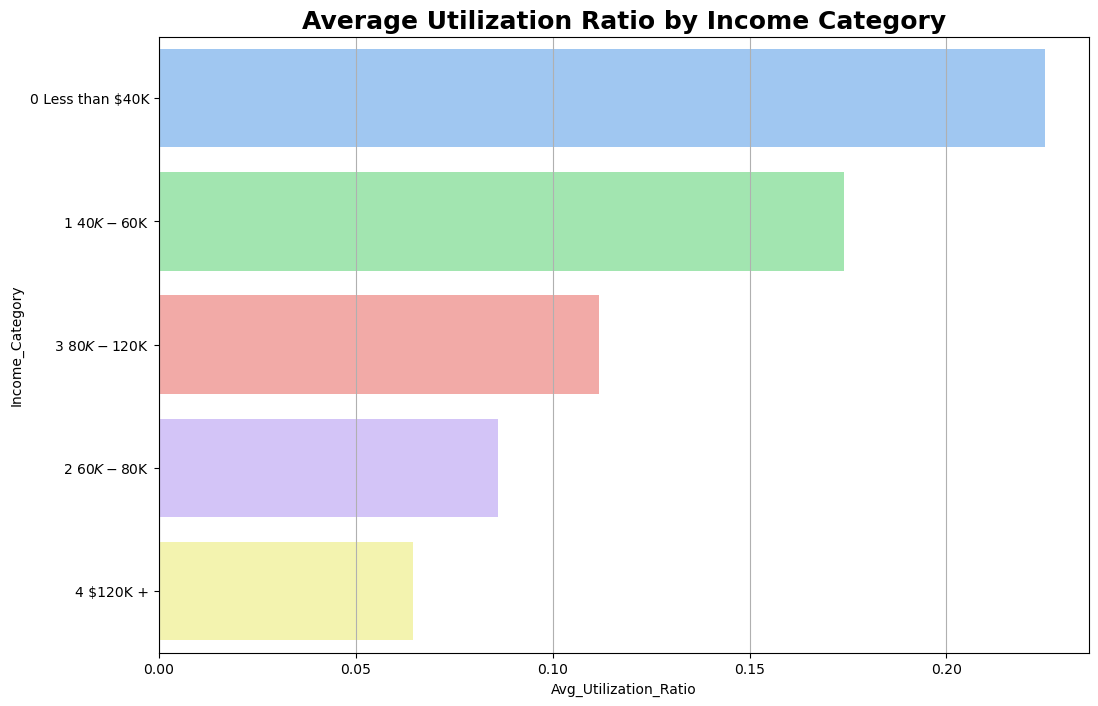

In [ ]:
# plot a bar plot showing average utilization ratio by income category
plt.figure(figsize=(12,8))
sns.barplot(data=attrition_income_df,x='Avg_Utilization_Ratio', y='Income_Category');
plt.title('Average Utilization Ratio by Income Category',fontsize=18,fontweight='bold');
plt.grid(axis='x');

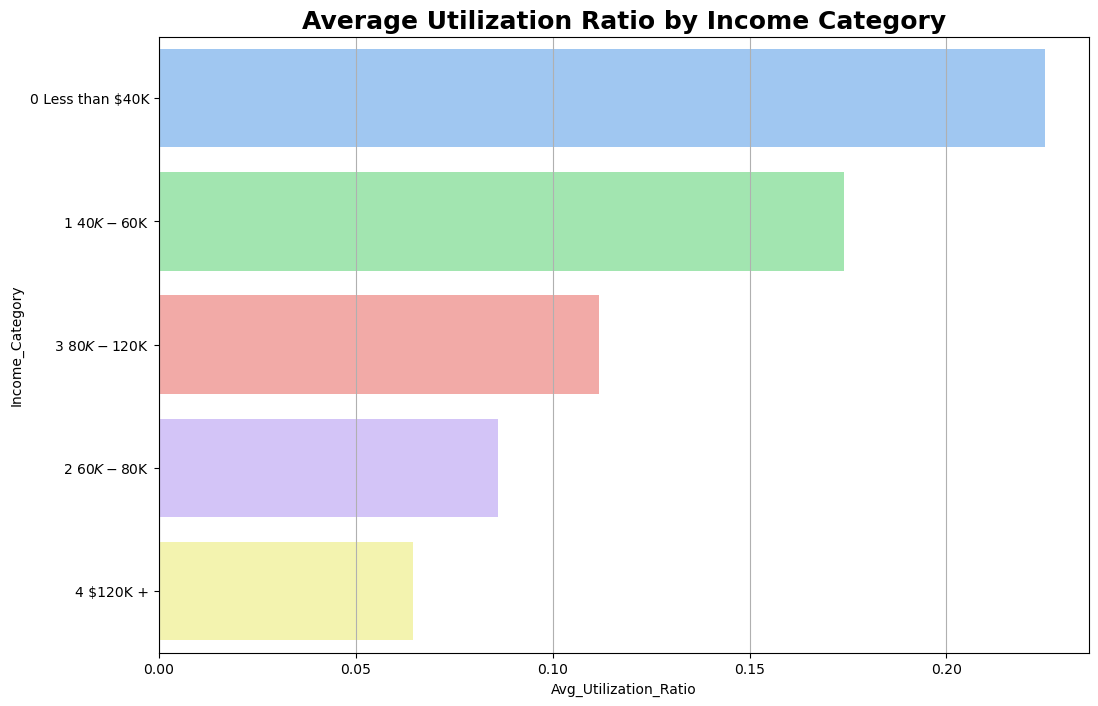

In [ ]:
# plot a bar plot showing average utilization ratio by income category
plt.figure(figsize=(12,8))
sns.barplot(data=existing_income_df,x='Avg_Utilization_Ratio', y='Income_Category');
plt.title('Average Utilization Ratio by Income Category',fontsize=18,fontweight='bold');
plt.grid(axis='x')

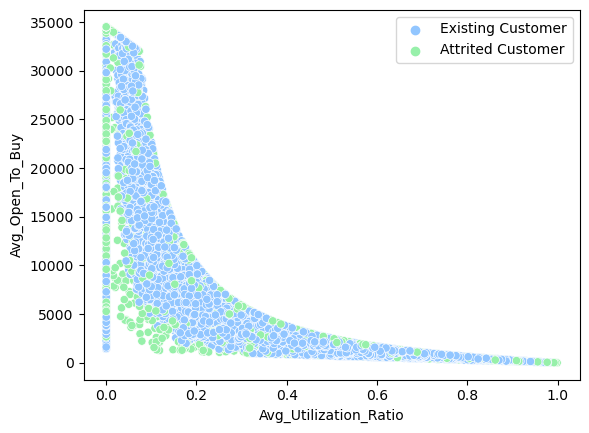

In [ ]:
sns.scatterplot(data = df, x = 'Avg_Utilization_Ratio', y = 'Avg_Open_To_Buy', hue = 'Attrition_Flag')
plt.legend();

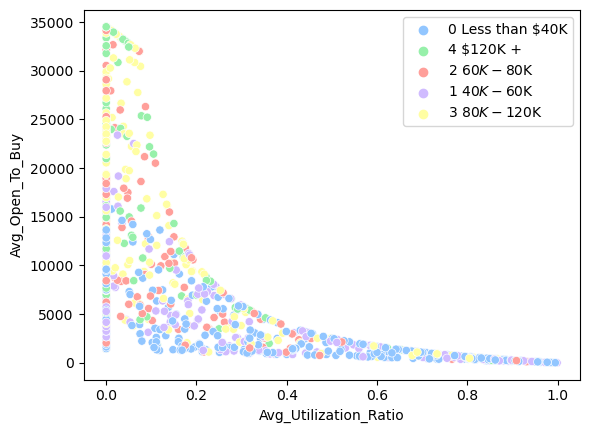

In [ ]:
sns.scatterplot(data = attrition_df, x = 'Avg_Utilization_Ratio', y = 'Avg_Open_To_Buy', hue = 'Income_Category')
plt.legend();

###**3 Credit Limit and Average Available to Buy Ratio**

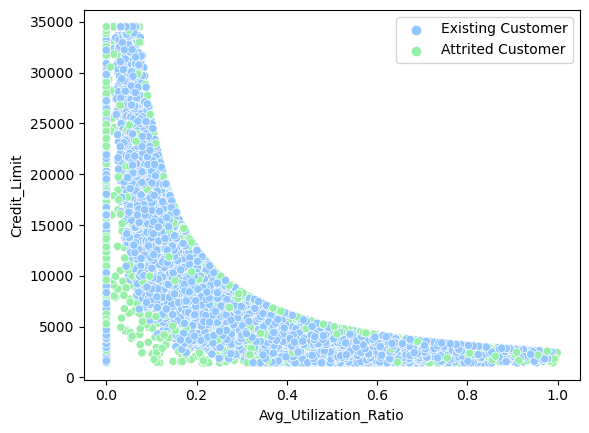

In [ ]:
sns.scatterplot(data = df, x = 'Avg_Utilization_Ratio', y = 'Credit_Limit', hue = 'Attrition_Flag')
plt.legend();

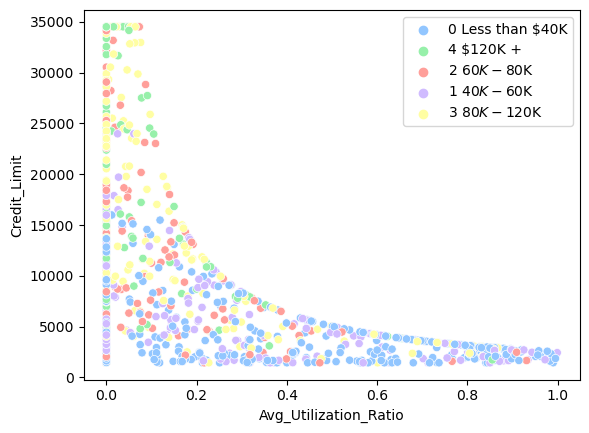

In [ ]:
sns.scatterplot(data = attrition_df, x = 'Avg_Utilization_Ratio', y = 'Credit_Limit', hue = 'Income_Category')
plt.legend();

##**Explanatory Visuals & Analysis : Part 3**

###**1 Average Utilization Ratio vs Total Revolving Balance**

<Figure size 1200x800 with 0 Axes>

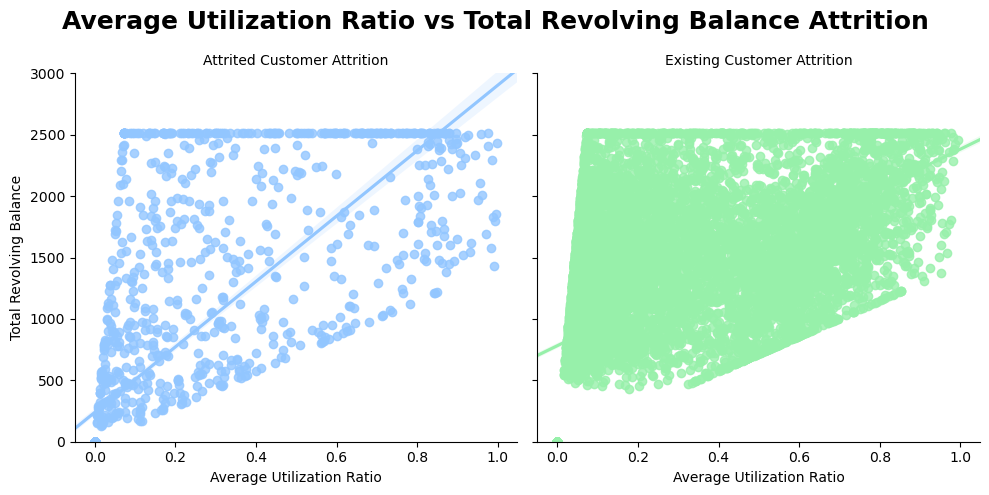

In [ ]:
plt.figure(figsize=(12,8))
i = sns.lmplot(data=df.sort_values(by='Income_Category'),x='Avg_Utilization_Ratio',  y='Total_Revolving_Bal',hue='Attrition_Flag', col='Attrition_Flag',truncate=False);
i.set_titles(col_template='{col_name} Attrition');
i.set_ylabels('Total Revolving Balance');
i.set_xlabels('Average Utilization Ratio');
plt.ylim(0,3000)
i.fig.suptitle('Average Utilization Ratio vs Total Revolving Balance Attrition',fontsize=18,fontweight='bold');
plt.tight_layout();

* #### As Average Utilization Ratio for credit card customers increases toward the maximum Total Revolving Balance, there is more attrition.
* #### There is a strong positive correlation between Average Utilization Ratio and Total Revolving Balance.

<Figure size 1200x800 with 0 Axes>

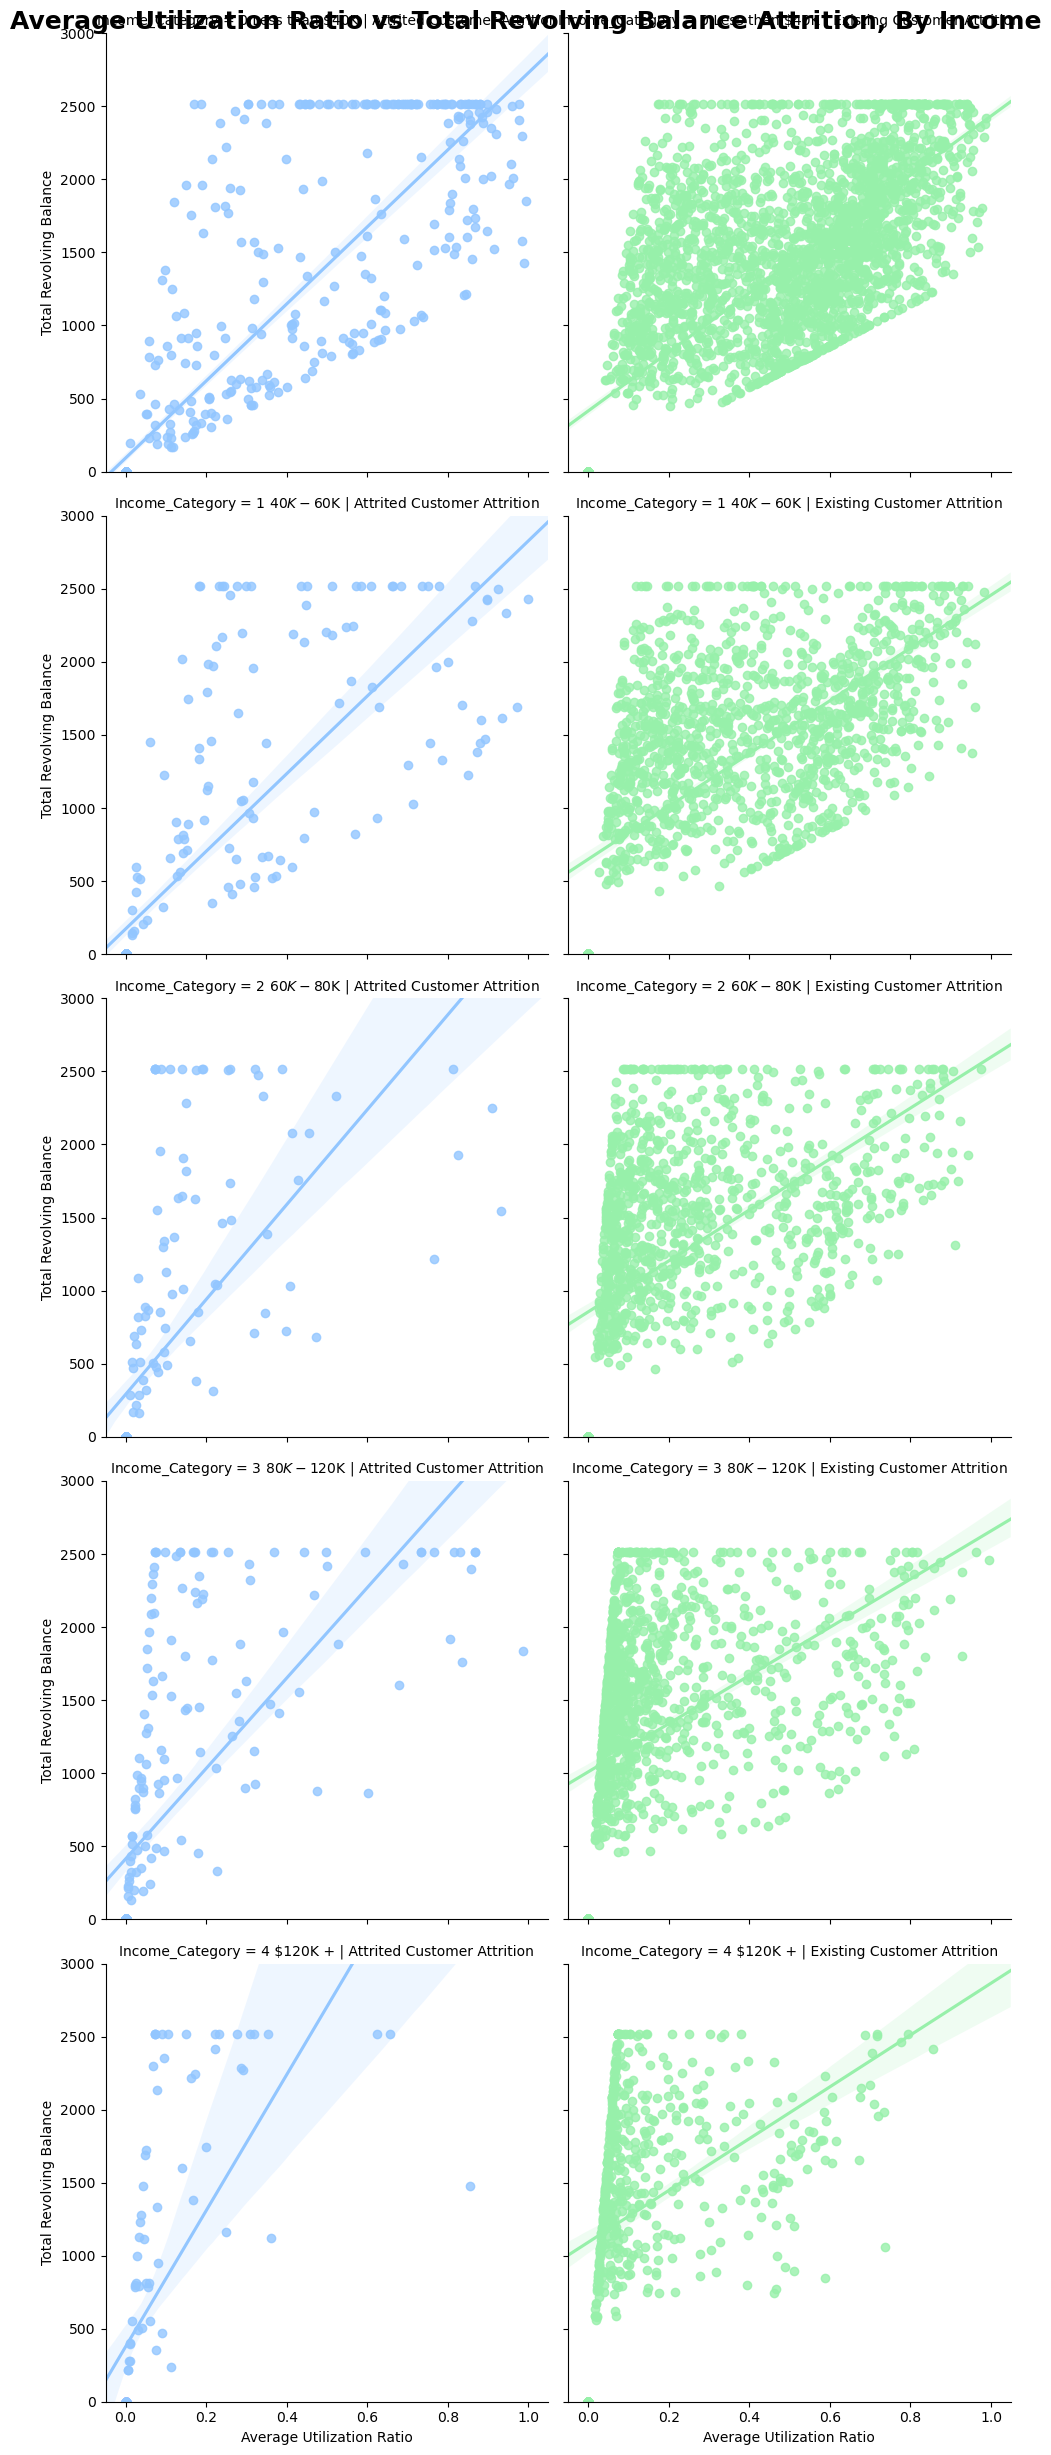

In [ ]:
plt.figure(figsize=(12,8))
g = sns.lmplot(data=df.sort_values(by='Income_Category'),x='Avg_Utilization_Ratio',  y='Total_Revolving_Bal',hue='Attrition_Flag', col='Attrition_Flag', row='Income_Category',truncate=False);
g.set_titles(col_template='{col_name} Attrition');
g.set_ylabels('Total Revolving Balance');
g.set_xlabels('Average Utilization Ratio');
plt.ylim(0, 3000);
g.fig.suptitle('Average Utilization Ratio vs Total Revolving Balance Attrition, By Income',fontsize=18,fontweight='bold');
plt.tight_layout();

* #### Further breaking down Average Utilization Ratio versus Total Revolving Balance, with increasing income, there are less customers leaving credit card company.
* #### Those with lesser income approach the maximum Total Revolving Balance quicker due to their less income.

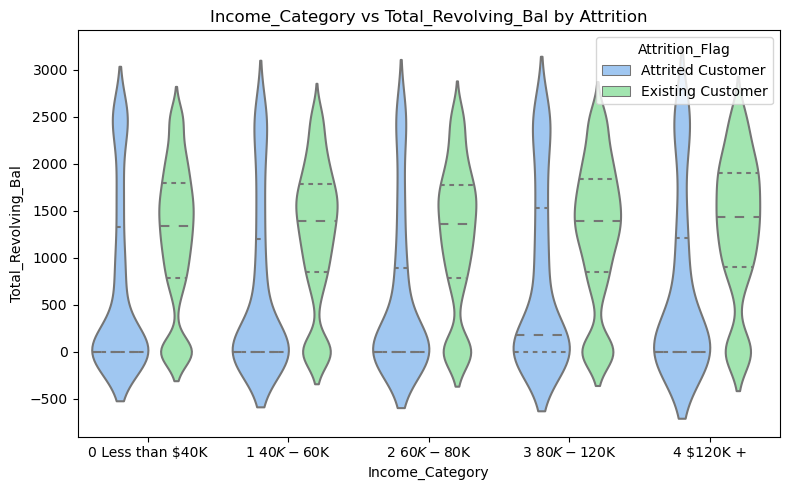

In [ ]:
plot_violin(data=df.sort_values(by='Income_Category'), x='Income_Category', y='Total_Revolving_Bal',hue='Attrition_Flag',split=False)

* ### Those with maximum Total Revolving Balance, as well as some with Total Revolving Balance of $0 also leave the credit card company.

### **2 Average Dollar Amount Available to Buy Ratio vs. Average Utilization Ratio**

Text(0, 0.5, 'Average Dollar Amount ($) Available to Buy')

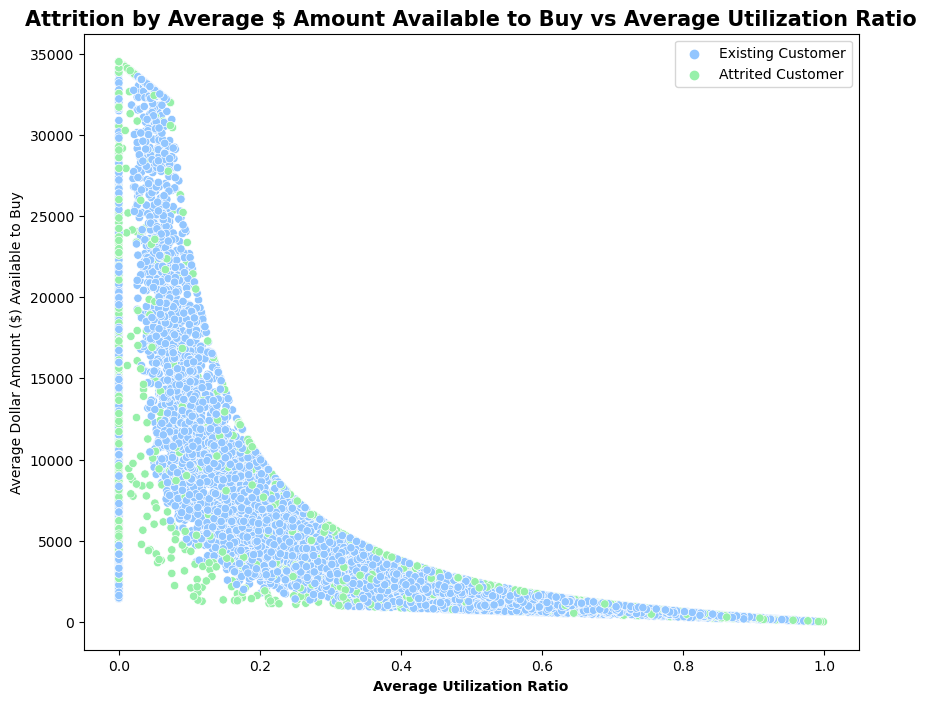

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df, x = 'Avg_Utilization_Ratio', y = 'Avg_Open_To_Buy', hue = 'Attrition_Flag')
plt.legend();
plt.title('Attrition by Average $ Amount Available to Buy vs Average Utilization Ratio',fontsize=15,fontweight='bold');
plt.xlabel('Average Utilization Ratio', fontsize=10, fontweight='bold');
plt.ylabel('Average Dollar Amount ($) Available to Buy')

* #### Credit card Customers using less credit available have more credit available to purchase, yet choose to exit the credit card company.
* #### Incentiving those with higher average dollars available to buy could decrease attrition from the credit card company.

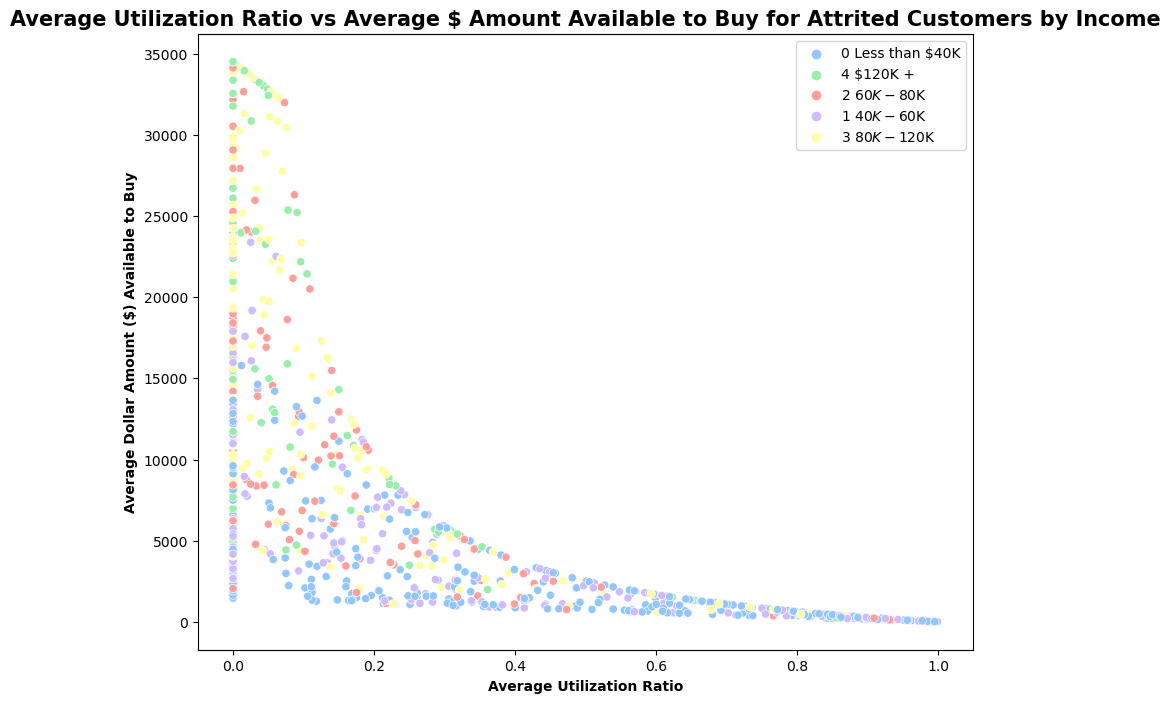

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = attrition_df, x = 'Avg_Utilization_Ratio', y = 'Avg_Open_To_Buy', hue = 'Income_Category')
plt.legend();
plt.title('Average Utilization Ratio vs Average $ Amount Available to Buy for Attrited Customers by Income',fontsize=15,fontweight='bold');
plt.xlabel('Average Utilization Ratio', fontsize=10, fontweight='bold');
plt.ylabel('Average Dollar Amount ($) Available to Buy', fontsize=10, fontweight='bold');

* #### Credit card customers with low Average Utilization Ratio and more Average Dollars available to buy are at a higher risk of leaving the credit card company.

###**3 Credit Limit and Average Available to Buy Ratio**

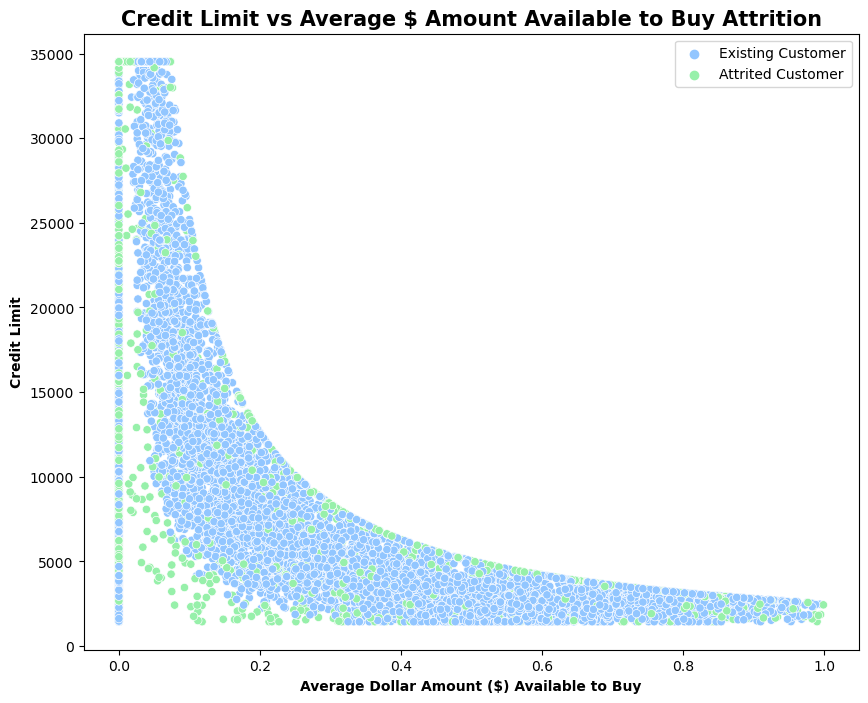

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df, x = 'Avg_Utilization_Ratio', y = 'Credit_Limit', hue = 'Attrition_Flag')
plt.legend();
plt.title('Credit Limit vs Average $ Amount Available to Buy Attrition',fontsize=15,fontweight='bold');
plt.xlabel('Average Dollar Amount ($) Available to Buy', fontsize=10, fontweight='bold');
plt.ylabel('Credit Limit', fontsize=10, fontweight='bold');

* #### Credit Limit is inversely proportional to Average Dollar Amount Available to Buy.
* #### Credit card customers who use less credit and have higher credit limits tend to leave the credit card company.

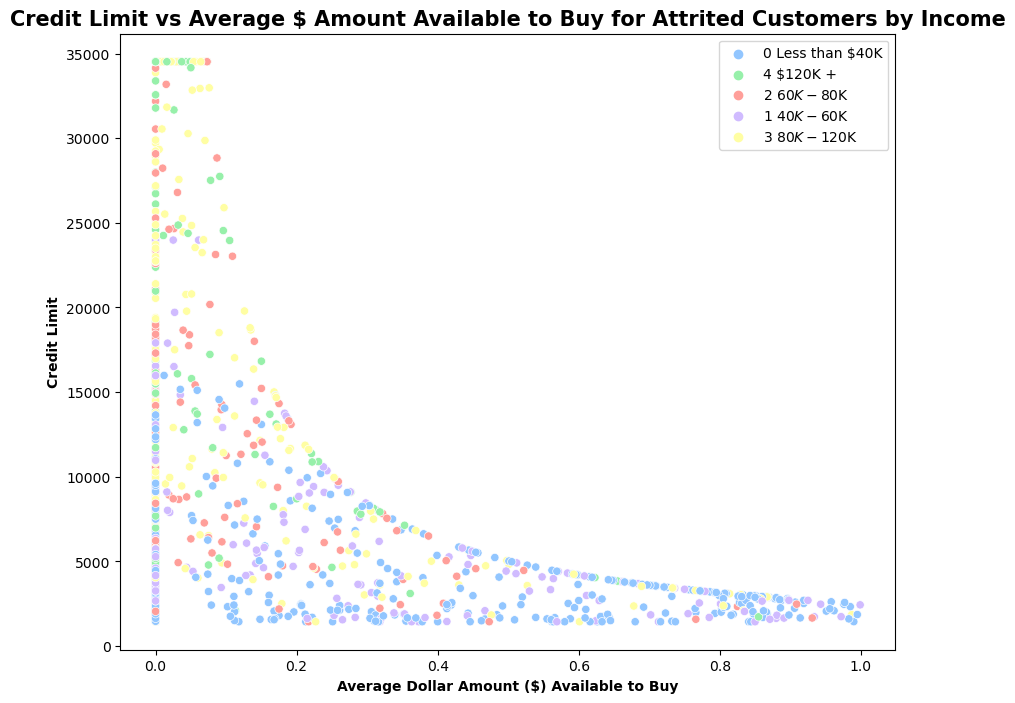

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = attrition_df, x = 'Avg_Utilization_Ratio', y = 'Credit_Limit', hue = 'Income_Category')
plt.legend();
plt.title('Credit Limit vs Average $ Amount Available to Buy for Attrited Customers by Income',fontsize=15,fontweight='bold');
plt.xlabel('Average Dollar Amount ($) Available to Buy', fontsize=10, fontweight='bold');
plt.ylabel('Credit Limit', fontsize=10, fontweight='bold');

* #### Those with higher income have higher credit limits and use less of their Dollar Available to buy tend to leave the credit card company.

#**Model Development: Part 4** <a name = "Model Development: Part 4">

---


##**Assignment: Project 2 - Part 4**

* Ensure that you complete the appropriate pre-processing steps.
* Fit and evaluate multiple types of models on your data.
    * Evaluate each model with multiple appropriate metrics on BOTH the train and test data.
    * Use **GridSearchCV** to tune some of the hyperparameters of each model.
    * Display the metrics of your best tuned version of each model type.
* Try feature engineering techniques or PCA to engineer your dataset to see how this impacts your modeling results. 
    *  We encourage you to try multiple techniques depending on your data!
*  Choose your "production" model and justify this decision using the metrics most important to your business problem.
*  Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!).

###**Readme**

---


*  Create a README.md file in your GitHub repository.  This README should include:
   *  Your business problem and stakeholders
   *  The source of your data
   *  A description of your data
   *  2 analytical insights from your data analysis.  
      *  You can use the 2 plots from Project 2, part 3 for this!
      *  They should include visualizations AND written interpretations
The metrics for your best model
   *  A description of how well your model would solve your business problem
   *  A summary with at least 2 recommendations for your stakeholders, based on your model performance AND analytical findings.

### **Naive Bayes Classifier Exploration**

---

> A Naive Bayes model is a classification technique based on Bayes’ Theorem with an independence assumption among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

* [Naive Bayes Classifier article](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/)

In [ ]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

### **Reloading the Data**

---



In [ ]:
df2.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

### **Exploring the Data**

---



In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
## Display the number of rows and columns for the dataframe
df2.shape
print(f'There are {df2.shape[0]} rows, and {df2.shape[1]} columns.')
print(f"The rows represent {df2.shape[0]} observations, and the columns represent {df2.shape[1]-1} features and 1 target variable, 'Attrition Flag'.")

There are 10127 rows, and 23 columns.
The rows represent 10127 observations, and the columns represent 22 features and 1 target variable, 'Attrition Flag'.


In [ ]:
# check column nammes
df2.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
## Rename Naive Bayes Classifier Attribution Flag month 1
df2.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'NB_Class_Inactive_1Yr',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NB_Class_Inactive_2Yr'},inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### **Drop Irrevalent Columns**

---



In [ ]:
# drop unique identifier, client num
df2.drop(columns='CLIENTNUM', inplace=True)

### **Check for Duplicate, Missing, or Erroneous Data**

---


#### **Duplicates**

---



In [ ]:
## Display the number of duplicate rows in the dataset
print(f'There are {df2.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


#### **Missing Values**

---



In [ ]:
# see which columns have missing values
df2.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
NB_Class_Inactive_1Yr       0
NB_Class_Inactive_2Yr       0
dtype: int64

* Initially, it appearts that there are no missing values.

#### **Inspect Values for Errors**

---


#### **Numeric:**

In [ ]:
## display descriptive statistics for numeric columns
df2.describe(include="number").round(2) # or 'object'

Customer_Age  Dependent_count  Months_on_book  \
count      10127.00         10127.00        10127.00   
mean          46.33             2.35           35.93   
std            8.02             1.30            7.99   
min           26.00             0.00           13.00   
25%           41.00             1.00           31.00   
50%           46.00             2.00           36.00   
75%           52.00             3.00           40.00   
max           73.00             5.00           56.00   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                  10127.00                10127.00   
mean                       3.81                    2.34   
std                        1.55                    1.01   
min                        1.00                    0.00   
25%                        3.00                    2.00   
50%                        4.00                    2.00   
75%                        5.00                    3.00   
max                        6.00                    6.00   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count               10127.00      10127.00             10127.00   
mean                    2.46       8631.95              1162.81   
std                     1.11       9088.78               814.99   
min                     0.00       1438.30                 0.00   
25%                     2.00       2555.00               359.00   
50%                     2.00       4549.00              1276.00   
75%                     3.00      11067.50              1784.00   
max                     6.00      34516.00              2517.00   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count         10127.00              10127.00         10127.00        10127.00   
mean           7469.14                  0.76          4404.09           64.86   
std            9090.69                  0.22          3397.13           23.47   
min               3.00                  0.00           510.00           10.00   
25%            1324.50                  0.63          2155.50           45.00   
50%            3474.00                  0.74          3899.00           67.00   
75%            9859.00                  0.86          4741.00           81.00   
max           34516.00                  3.40         18484.00          139.00   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  NB_Class_Inactive_1Yr  \
count             10127.00               10127.00               10127.00   
mean                  0.71                   0.27                   0.16   
std                   0.24                   0.28                   0.37   
min                   0.00                   0.00                   0.00   
25%                   0.58                   0.02                   0.00   
50%                   0.70                   0.18                   0.00   
75%                   0.82                   0.50                   0.00   
max                   3.71                   1.00                   1.00   

       NB_Class_Inactive_2Yr  
count               10127.00  
mean                    0.84  
std                     0.37  
min                     0.00  
25%                     1.00  
50%                     1.00  
75%                     1.00  
max                     1.00

* No numeric values seem out of the ordinary, ok.

#### **Categorical:**

In [ ]:
## display descriptive statistics for categorical columns
df2.describe(include="object") # or 'number'

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [ ]:
# find string data 
data_types = df2.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [ ]:
# loop through string data to inspect for inconsistent values
for col in str_cols:
   print(f'= {col}:')
   print(df2[col].value_counts(dropna=False))
   print("\n\n")

= Attrition_Flag:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64



= Gender:
F    5358
M    4769
Name: Gender, dtype: int64



= Education_Level:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64



= Marital_Status:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64



= Income_Category:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64



= Card_Category:
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64





* Education Level, Marital Status, & Income Category have 'Unknown' values.
   * These appear to be missing values.
* There are no inconsistent values (i.e. spelling errors) but some require ordinal order.
   * Ordinal : Education Level, Income Category, Card Category
   * OneHotEncode : Gender, Marital Status

In [ ]:
# ? category for Education Level, Marital Status, & Income Category have category 'Unknown' => looks like missing or unknown values
# replace as missing value
df2 = df2.replace('Unknown', np.nan)

###**Missing Values**

---



In [ ]:
## display the total number of missing values
print(f'There are {df2.isna().sum().sum()} missing values.')

There are 3380 missing values.


In [ ]:
## If there are missing values we could
## Display the count of missing values by column
print(df2.isna().sum())

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
NB_Class_Inactive_1Yr          0
NB_Class_Inactive_2Yr          0
dtype: int64


In [ ]:
## display percentage of missing values by column
print(df2.isna().sum()/len(df2)*100)

Attrition_Flag               0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Education_Level             14.999506
Marital_Status               7.396070
Income_Category             10.980547
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Avg_Utilization_Ratio        0.000000
NB_Class_Inactive_1Yr        0.000000
NB_Class_Inactive_2Yr        0.000000
dtype: float64


####**Missing categorical values:**
, We'll need to impute with a Preprocessor for Machine Learning.
   * **Education Level** : Plan to impute with most frequent value.
      * *This will introduce error into model.*
      * There was little correlation so using simple imputation.
   * **Marital Status** : Plan to impute with most frequent value.
      * *This will introduce error into model.*
      * It is more likely for person to be married if older, so for imputation, setting an age of those over 30 as 'married', otherwise 'single'
   * **Income Category** : Plan to impute with most frequent value.
      * *This will introduce error into model.*
      * For imputation , plan to impute for most frequent income category by age.

#### **Ordinal Categorical Values:**
   * **Education Level** : in this order
      * Uneducated, High School, College, Graduate, Post-Graduate, Doctorate   
   * **Income Category** : in this order
      * Less than $40K, $40K - $60K, $60K - $80K, $80K - $120K, $120K +
   * **Card Category** : in this order
      * Blue, Silver, Gold, Platinum
   * **Age Classes** : in this order 
      * Under35, 35to45, 45to55, Over55
         * adding these age categories

#### **One-Hot Encoded Categorical Values:**
   *  **Gender** :
      * F, M
   *  **Marital Status**:
      * Single, Married, Divorced




In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
df2['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
# convert target to numeric values
df2['Attrition_Flag'] = df2['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1})

In [ ]:
df2['Age_Class'] = df2['Customer_Age'].round(-1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
df2['Age_Class'].replace({30:'Under35',40:'35to45',50:'45to55',60:'Over55',70:'Over55'},inplace=True)

In [ ]:
df2['Age_Class'].value_counts()

35to45     3926
45to55     3856
Over55     1610
Under35     735
Name: Age_Class, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### **Define Feature (X) and target (y)**

---


* assign 'Attrition_Flag' as target (y)
* rest as Feature Matrix (X)

* Extracting these feature columns should improve model performance, give low correlation, per EDA analysis: 
   * **Dependent_count** : Though customers with fewer dependents, likely Single have lower dependent count, this has low correlation to whether customer leaves.
   * **Months_on_books** : How long customer has been a member has low correlation to whether customer leaves.
   * **Credit_Limit** : Though credit limit correlates to type of Card category, it is also a part of Utilization Ratio, which is a better predictor of whether a customer exits the credit card company.
   * **Total_Amt_Chng_Q4_Q1** : How much the amount changed from Q4 to Q1 has low correlation to whether customer exited credit card company.
   * **Total_Trans_Amt** : Total transactions amount has low correlation.
   * **Total_Trans_Ct** : The number of transactions has low correlation to whether customer left credit card.
   * **Total_Ct_Chng_Q4_Q1** : Total Count of transactions has little effect on whether customer exits credit card.



In [ ]:
# define target y
y = df2['Attrition_Flag']
# define features X
X = df2.drop(columns=['Attrition_Flag','Dependent_count','Months_on_book','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'])
X


Customer_Age Gender Education_Level Marital_Status Income_Category  \
0                45      M     High School        Married     $60K - $80K   
1                49      F        Graduate         Single  Less than $40K   
2                51      M        Graduate        Married    $80K - $120K   
3                40      F     High School            NaN  Less than $40K   
4                40      M      Uneducated        Married     $60K - $80K   
...             ...    ...             ...            ...             ...   
10122            50      M        Graduate         Single     $40K - $60K   
10123            41      M             NaN       Divorced     $40K - $60K   
10124            44      F     High School        Married  Less than $40K   
10125            30      M        Graduate            NaN     $40K - $60K   
10126            43      F        Graduate        Married  Less than $40K   

      Card_Category  Total_Relationship_Count  Months_Inactive_12_mon  \
0              Blue                         5                       1   
1              Blue                         6                       1   
2              Blue                         4                       1   
3              Blue                         3                       4   
4              Blue                         5                       1   
...             ...                       ...                     ...   
10122          Blue                         3                       2   
10123          Blue                         4                       2   
10124          Blue                         5                       3   
10125          Blue                         4                       3   
10126        Silver                         6                       2   

       Contacts_Count_12_mon  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                          3                  777          11914.0   
1                          2                  864           7392.0   
2                          0                    0           3418.0   
3                          1                 2517            796.0   
4                          0                    0           4716.0   
...                      ...                  ...              ...   
10122                      3                 1851           2152.0   
10123                      3                 2186           2091.0   
10124                      4                    0           5409.0   
10125                      3                    0           5281.0   
10126                      4                 1961           8427.0   

       Avg_Utilization_Ratio  NB_Class_Inactive_1Yr  NB_Class_Inactive_2Yr  \
0                      0.061               0.000093               0.999910   
1                      0.105               0.000057               0.999940   
2                      0.000               0.000021               0.999980   
3                      0.760               0.000134               0.999870   
4                      0.000               0.000022               0.999980   
...                      ...                    ...                    ...   
10122                  0.462               0.000191               0.999810   
10123                  0.511               0.995270               0.004729   
10124                  0.000               0.997880               0.002118   
10125                  0.000               0.996710               0.003294   
10126                  0.189               0.996620               0.003377   

      Age_Class  
0        35to45  
1        45to55  
2        45to55  
3        35to45  
4        35to45  
...         ...  
10122    45to55  
10123    35to45  
10124    35to45  
10125   Under35  
10126    35to45  

[10127 rows x 15 columns]

### **Dataframe Info & Shape**

---



In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Education_Level           8608 non-null   object 
 3   Marital_Status            9378 non-null   object 
 4   Income_Category           9015 non-null   object 
 5   Card_Category             10127 non-null  object 
 6   Total_Relationship_Count  10127 non-null  int64  
 7   Months_Inactive_12_mon    10127 non-null  int64  
 8   Contacts_Count_12_mon     10127 non-null  int64  
 9   Total_Revolving_Bal       10127 non-null  int64  
 10  Avg_Open_To_Buy           10127 non-null  float64
 11  Avg_Utilization_Ratio     10127 non-null  float64
 12  NB_Class_Inactive_1Yr     10127 non-null  float64
 13  NB_Class_Inactive_2Yr     10127 non-null  float64
 14  Age_Cl

In [ ]:
X.shape

(10127, 15)

### **Validation Split**

---



In [ ]:
#  split the training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

Customer_Age Gender Education_Level Marital_Status Income_Category  \
7525            46      F     High School        Married  Less than $40K   
2420            47      M        Graduate            NaN     $60K - $80K   
8149            43      M        Graduate        Married     $60K - $80K   
9278            41      M             NaN         Single    $80K - $120K   
9175            44      M      Uneducated            NaN    $80K - $120K   
...            ...    ...             ...            ...             ...   
5734            44      F        Graduate         Single     $40K - $60K   
5191            53      F     High School       Divorced             NaN   
5390            42      F        Graduate            NaN  Less than $40K   
860             40      M             NaN         Single     $40K - $60K   
7270            53      M     High School         Single     $60K - $80K   

     Card_Category  Total_Relationship_Count  Months_Inactive_12_mon  \
7525          Blue                         5                       2   
2420          Blue                         3                       2   
8149          Blue                         2                       3   
9278          Blue                         1                       2   
9175          Blue                         1                       3   
...            ...                       ...                     ...   
5734          Blue                         3                       2   
5191          Blue                         4                       3   
5390          Blue                         3                       1   
860           Blue                         4                       1   
7270          Blue                         5                       1   

      Contacts_Count_12_mon  Total_Revolving_Bal  Avg_Open_To_Buy  \
7525                      1                 1332           1042.0   
2420                      4                 1562           2687.0   
8149                      5                    0           1438.3   
9278                      3                 2267          11412.0   
9175                      1                 1528          23900.0   
...                     ...                  ...              ...   
5734                      5                 2517           1625.0   
5191                      6                    0           7939.0   
5390                      2                 1547            767.0   
860                       1                 1707           1856.0   
7270                      2                    0           3858.0   

      Avg_Utilization_Ratio  NB_Class_Inactive_1Yr  NB_Class_Inactive_2Yr  \
7525                  0.561               0.000070               0.999930   
2420                  0.368               0.000327               0.999670   
8149                  0.000               0.998920               0.001083   
9278                  0.166               0.000210               0.999790   
9175                  0.060               0.000117               0.999880   
...                     ...                    ...                    ...   
5734                  0.608               0.998120               0.001881   
5191                  0.000               0.999370               0.000632   
5390                  0.669               0.000058               0.999940   
860                   0.479               0.000038               0.999960   
7270                  0.000               0.000056               0.999940   

     Age_Class  
7525    45to55  
2420    45to55  
8149    35to45  
9278    35to45  
9175    35to45  
...        ...  
5734    35to45  
5191    45to55  
5390    35to45  
860     35to45  
7270    45to55  

[7595 rows x 15 columns]

### **PreProcessing**

---


#### **Identify Feature Types:**

---


* **Numeric** : 
  *  no missing values
* **Categorical** : 
  *  missing Education Level, Marital_Status, Income Category
  * **Ordinal Categories**: Education Level, Income Category, Card Category, Age Class
  * **Nominal Categories**: Gender, Marital Status

#### **Marital Status Imputation**

---


*  if Customer Age > 30, impute with 'Married'
*  if Customer Age < 30, impute with 'Single'

In [ ]:
over30_filter = df2['Customer_Age'] > 30
over30_df2 = df2.loc[over30_filter,:]
over30_df2.describe(include='all')

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
count      9862.000000   9862.000000   9862      9862.000000            8387   
unique             NaN           NaN      2              NaN               6   
top                NaN           NaN      F              NaN        Graduate   
freq               NaN           NaN   5232              NaN            3049   
mean          0.161732     46.817583    NaN         2.395964             NaN   
std           0.368223      7.529295    NaN         1.275575             NaN   
min           0.000000     31.000000    NaN         0.000000             NaN   
25%           0.000000     41.000000    NaN         1.000000             NaN   
50%           0.000000     47.000000    NaN         2.000000             NaN   
75%           0.000000     52.000000    NaN         3.000000             NaN   
max           1.000000     73.000000    NaN         5.000000             NaN   

       Marital_Status Income_Category Card_Category  Months_on_book  \
count            9127            8797          9862     9862.000000   
unique              3               5             4             NaN   
top           Married  Less than $40K          Blue             NaN   
freq             4612            3434          9184             NaN   
mean              NaN             NaN           NaN       36.303995   
std               NaN             NaN           NaN        7.624255   
min               NaN             NaN           NaN       13.000000   
25%               NaN             NaN           NaN       32.000000   
50%               NaN             NaN           NaN       36.000000   
75%               NaN             NaN           NaN       41.000000   
max               NaN             NaN           NaN       56.000000   

        Total_Relationship_Count  Months_Inactive_12_mon  \
count                9862.000000             9862.000000   
unique                       NaN                     NaN   
top                          NaN                     NaN   
freq                         NaN                     NaN   
mean                    3.807848                2.345772   
std                     1.557174                1.011491   
min                     1.000000                0.000000   
25%                     3.000000                2.000000   
50%                     4.000000                2.000000   
75%                     5.000000                3.000000   
max                     6.000000                6.000000   

        Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count             9862.000000   9862.000000          9862.000000   
unique                    NaN           NaN                  NaN   
top                       NaN           NaN                  NaN   
freq                      NaN           NaN                  NaN   
mean                 2.447779   8695.187781          1164.145914   
std                  1.106929   9137.783146           815.486236   
min                  0.000000   1438.300000             0.000000   
25%                  2.000000   2563.000000           365.000000   
50%                  2.000000   4589.000000          1279.000000   
75%                  3.000000  11173.750000          1786.000000   
max                  6.000000  34516.000000          2517.000000   

        Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
count       9862.000000           9862.000000      9862.000000   
unique              NaN                   NaN              NaN   
top                 NaN                   NaN              NaN   
freq                NaN                   NaN              NaN   
mean        7531.041868              0.759449      4403.572399   
std         9141.559534              0.219596      3377.973225   
min            3.000000              0.000000       510.000000   
25%         1332.500000              0.630000      2150.250000   
50%         3503.000000              0.736000      3918.000000

In [ ]:
under30_filter = ~over30_filter
under30_df = df2.loc[under30_filter,:]
under30_df.describe(include='all')

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
count       265.000000    265.000000    265       265.000000             221   
unique             NaN           NaN      2              NaN               5   
top                NaN           NaN      M              NaN        Graduate   
freq               NaN           NaN    139              NaN              79   
mean          0.120755     28.030189    NaN         0.494340             NaN   
std           0.326459      1.604632    NaN         0.634374             NaN   
min           0.000000     26.000000    NaN         0.000000             NaN   
25%           0.000000     26.000000    NaN         0.000000             NaN   
50%           0.000000     28.000000    NaN         0.000000             NaN   
75%           0.000000     30.000000    NaN         1.000000             NaN   
max           1.000000     30.000000    NaN         2.000000             NaN   

       Marital_Status Income_Category Card_Category  Months_on_book  \
count             251             218           265      265.000000   
unique              3               5             3             NaN   
top            Single  Less than $40K          Blue             NaN   
freq              144             127           252             NaN   
mean              NaN             NaN           NaN       21.950943   
std               NaN             NaN           NaN        8.591831   
min               NaN             NaN           NaN       13.000000   
25%               NaN             NaN           NaN       15.000000   
50%               NaN             NaN           NaN       19.000000   
75%               NaN             NaN           NaN       25.000000   
max               NaN             NaN           NaN       36.000000   

        Total_Relationship_Count  Months_Inactive_12_mon  \
count                 265.000000              265.000000   
unique                       NaN                     NaN   
top                          NaN                     NaN   
freq                         NaN                     NaN   
mean                    3.988679                2.169811   
std                     1.439389                0.964048   
min                     1.000000                0.000000   
25%                     3.000000                1.000000   
50%                     4.000000                2.000000   
75%                     5.000000                3.000000   
max                     6.000000                6.000000   

        Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count              265.000000    265.000000           265.000000   
unique                    NaN           NaN                  NaN   
top                       NaN           NaN                  NaN   
freq                      NaN           NaN                  NaN   
mean                 2.735849   6278.691321          1113.249057   
std                  1.043576   6621.690163           796.118085   
min                  0.000000   1438.300000             0.000000   
25%                  2.000000   2404.000000             0.000000   
50%                  3.000000   3682.000000          1204.000000   
75%                  3.000000   7469.000000          1670.000000   
max                  6.000000  34516.000000          2517.000000   

        Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
count        265.000000            265.000000       265.000000   
unique              NaN                   NaN              NaN   
top                 NaN                   NaN              NaN   
freq                NaN                   NaN              NaN   
mean        5165.442264              0.778245      4423.211321   
std         6545.012145              0.203743      4053.585277   
min           14.000000              0.299000       869.000000   
25%         1098.000000              0.643000      2236.000000   
50%         2507.000000              0.754000      2591.000000

In [ ]:
# trying to impute 2 different values for < 30 vs > 30 for imputing Marital Status
# trying to impute Income Category based on age

#### **Instantiate Column Selectors & Transformers**

---



In [ ]:
# Instantiate categorical & numerical column selectors or list columns
num_cols = make_column_selector(dtype_include='number')
ord_cols = ['Education_Level','Income_Category','Card_Category', 'Age_Class']
nom_cols = ['Gender', 'Marital_Status']

# Instantiate Standard Scaler
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Instantiate Imputer most frequent for Defaulted value
freq_imputer = SimpleImputer(strategy='most_frequent')

# create replacement dictionaries
education_order = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
card_order = ['Blue', 'Silver', 'Gold', 'Platinum']
age_order = ['Under35','35to45', '45to55', 'Over55']

# instantiate ordinal encoder
ord_enc = OrdinalEncoder(categories=[education_order,income_order,card_order, age_order])


#### **Instantiate Pipelines**

---



In [ ]:
# Setup the pipelines for the numeric columns
num_pipe = make_pipeline(scaler)
num_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [ ]:
# setup pipeline for ordinal categorical columns
ord_cat_pipe = make_pipeline(freq_imputer, ord_enc, scaler)
ord_cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Uneducated', 'High School',
                                             'College', 'Graduate',
                                             'Post-Graduate', 'Doctorate'],
                                            ['Less than $40K', '$40K - $60K',
                                             '$60K - $80K', '$80K - $120K',
                                             '$120K +'],
                                            ['Blue', 'Silver', 'Gold',
                                             'Platinum'],
                                            ['Under35', '35to45', '45to55',
                                             'Over55']])),
                ('standardscaler', StandardScaler())])

In [ ]:
# setup pipeline for nominal categorical columns
nom_cat_pipe = make_pipeline(freq_imputer, ohe)
nom_cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

#### **Instantiate Column Transformers**

---



In [ ]:
# Setup the tuples to pair the processors with the make column selectors
num_tuple = (num_pipe, num_cols)
ord_cat_tuple = (ord_cat_pipe, ord_cols)
nom_cat_tuple = (nom_cat_pipe, nom_cols)

In [ ]:
# Instantiate ColumnTransformer
preprocessor = make_column_transformer(num_tuple, ord_cat_tuple, nom_cat_tuple,
                                    remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000024403802640>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Unedu...
                                                                              'Gold',
                                                                              'Platinum'],
                                                                             ['Under35',
                                                                              '35to45',
                                                                              '45to55',
                                                                              'Over55']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Education_Level', 'Income_Category',
                                  'Card_Category', 'Age_Class']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Gender', 'Marital_Status'])])

### **Fit & Transform Data**

---



In [ ]:
# Fit the ColumnTransformer on the X_train
preprocessor.fit(X_train)



ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000024403802640>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Unedu...
                                                                              'Gold',
                                                                              'Platinum'],
                                                                             ['Under35',
                                                                              '35to45',
                                                                              '45to55',
                                                                              'Over55']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Education_Level', 'Income_Category',
                                  'Card_Category', 'Age_Class']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Gender', 'Marital_Status'])])

In [ ]:
# Transform the X_train and the X_test
X_train_processed = preprocessor.transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

#### **Inspect Result:**

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (7595, 18)




array([[-0.03615673,  0.7655157 , -0.33972936, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.08843963, -0.52050327, -0.33972936, ...,  0.        ,
         1.        ,  0.        ],
       [-0.40994584, -1.16351275,  0.64660263, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.53454221, -0.52050327, -1.32606136, ...,  0.        ,
         1.        ,  0.        ],
       [-0.78373495,  0.12250622, -1.32606136, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.83601785,  0.7655157 , -1.32606136, ...,  0.        ,
         0.        ,  1.        ]])

### **Classification Functions**

---



In [ ]:
# define plot labels
labels = ['Existing Customer','Bye-Bye Customer']

In [ ]:
# create function to plot Confusion Matrix & Classification reports for Train & Test Data
def plot_classification_traintest_metrics(pipe, X_train, y_train, X_test, y_test, model_name='Classification Model', cmap='Purples'):
 
  # save predictions for training & test data
  train_preds = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)

  fig, axes = plt.subplots(1,2, figsize=(10,4))


  ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        cmap=cmap, normalize='true',
                                        display_labels=labels, ax=axes[0])

  axes[0].set_title(f'{model_name} Train')

  ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        cmap=cmap, normalize='true'
                                        ,
                                        display_labels=labels, ax=axes[1])

  axes[1].set_title(f'{model_name} Test')
  plt.tight_layout()
  plt.show()

  train_report = classification_report(y_train, train_preds,
                                         target_names=labels)
  print(f'{model_name} Train Classification Report')
  print(train_report)

  test_report = classification_report(y_test, test_preds, target_names=labels)
  print(f'{model_name} Test Classification Report')
  print(test_report)


### **PCA Preparation**

---
* determine number of components


### **Scale Data**

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# create PCA pipe with scaler, PCA covering 95% variance, and KNN classifier
pipe_prePCA = make_pipeline(
    preprocessor,
    scaler
)

# Fit & transform data.
scaled_df = pipe_prePCA.fit_transform(X)




### **Apply PCA**

In [ ]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

In [ ]:
### **Visualize Scree Plot**

In [ ]:
# Note: this shows how much of the variance does each component explain

pd.Series(pca.explained_variance_ratio_)[0:200]

0     1.826837e-01
1     1.341237e-01
2     1.098192e-01
3     1.024613e-01
4     7.931812e-02
5     6.614103e-02
6     6.294489e-02
7     5.637944e-02
8     5.548793e-02
9     5.331840e-02
10    4.449532e-02
11    2.584420e-02
12    1.370234e-02
13    9.738429e-03
14    3.541940e-03
15    1.710939e-12
16    6.580720e-31
17    4.415144e-34
dtype: float64

C:\Users\sweet\AppData\Local\Temp\ipykernel_18748\3313075923.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


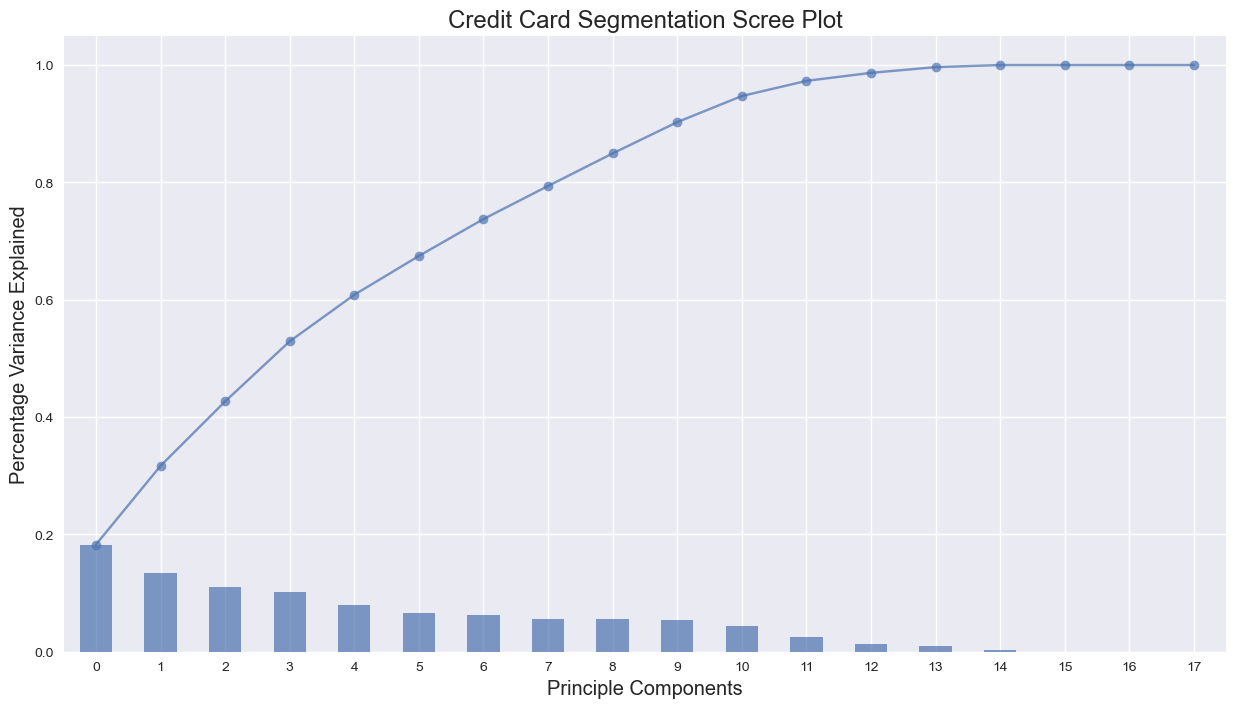

In [ ]:
# Lets visual the cummulative sum of the variances 

plt.style.use("seaborn")
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_)

# Plot the variance for each component
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)
    
# Plot line chart of increasing variances
pd.Series(var_ls).plot(marker="o", alpha=0.7) 

# Plot labels and titles
plt.xlabel("Principal Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Credit Card Segmentation Scree Plot", fontsize="xx-large")
plt.show();

* ### The number of components to account for ~95% of the variance is 11.

### **1 KNN PCA Model**

---

In [ ]:
# create PCA pipe with scaler, PCA with 11 principal components, and KNN classifier
pipe_PCA = make_pipeline(
    preprocessor,
    scaler,
    PCA(n_components=11),
    KNeighborsClassifier()
)

In [ ]:
# fit PCA pipe (see how long it takes)
%timeit pipe_PCA.fit(X_train,y_train)

161 ms ± 2.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# create pipe without PCA, with scaler & KNN classifier
pipe_noPCA = make_pipeline(
    preprocessor,
    scaler,
    KNeighborsClassifier(n_neighbors=1)
)

In [ ]:
# fit no PCA pipe (see how long it takes)
%timeit pipe_noPCA.fit(X_train,y_train)

81.1 ms ± 3.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# Checking the accurancy of our model with PCA 
print('PCA Pipe Testing accuracy:', pipe_PCA.score(X_test, y_test))

PCA Pipe Testing accuracy: 1.0


In [ ]:
# pca model
%timeit
preds_pca = pipe_PCA.predict(X_test)
print(classification_report(y_test, preds_pca))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2113
           1       1.00      1.00      1.00       419

    accuracy                           1.00      2532
   macro avg       1.00      1.00      1.00      2532
weighted avg       1.00      1.00      1.00      2532



In [ ]:
# Checking the accurancy of our model without PCA 
print('No PCA Testing accuracy:', pipe_noPCA.score(X_test, y_test))

No PCA Testing accuracy: 1.0


In [ ]:
# no pca model
%timeit
preds_nopca = pipe_noPCA.predict(X_test)
print(classification_report(y_test, preds_nopca))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2113
           1       1.00      1.00      1.00       419

    accuracy                           1.00      2532
   macro avg       1.00      1.00      1.00      2532
weighted avg       1.00      1.00      1.00      2532



* Need TA assistance as results are 100% accurate, something's wrong.